### Проведение EDA и определение: какие условия жизни учащихся в возрасте от 15 до 22 лет влияют на успеваемость по математики.

In [1]:
# libraries
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
%matplotlib inline
warnings.simplefilter('ignore')
sns.set()

In [2]:
# function
def column_analysis(col):
    """Функция проводит первичный анализ данных столбца.
    Параметр функции передется df['name_columns']
    1. Производит подсчет уникальных значений
    2. Подсчет пропусков
    """

    # Создание рабочего DF
    df = pd.DataFrame(col.value_counts())
    df['%'] = round(col.value_counts(normalize=True)*100, 2)
    name_col = list(df.columns)

    print(f'Анализ столбца - {name_col[0]}')
    print(f'{value_col[name_col[0]]}')

    display(df)

    # Подсчет пропусков
    x_NaN = col.isnull().sum()
    if x_NaN % 10 == 1:
        znach = 'значение'
    elif 1 < x_NaN % 10 < 5:
        znach = 'значения'
    else:
        znach = 'значений'
    print(
        f'Пропущено: {x_NaN} {znach}, что составляет {round(x_NaN/len(col)*100, 2)} %')

    print('-----')
    print()

In [3]:
def pivot_t_score_group(col, func='count'):
    """Функция применяется только к текущему проекту.
    Принимает название столбца 'name_columns' и на выходе получаем сводную таблицу 
    с группировкой признака получаемой колонки в разрезе групп оценок, установленной дополнительной колонкой.
    Так же подсчет процентного соотношения в разрезе групп оценок.
    """
    print(f'Сводная таблица по столбцу - {col}')
    print(f'{value_col[col]}')

    df = pd.pivot_table(score_group_1_5, index=[
        'score_group'],  columns=[col], values=['score'],  aggfunc=func, margins=True)
    name_col = df.columns
    i = 0
    for el in list(name_col):
        if el[1] != 'All':
            new_col = '% ' + str(el[1])
            df[new_col] = round(df[name_col[i]]/df[('score', 'All')] * 100, 1)
        i += 1
    return df

In [4]:
def get_boxplot(column):
    """Построение графика БоксПлот"""
    fig, ax = plt.subplots()
    sns.boxplot(x=column, y='score',
                data=score_group_1_5,
                ax=ax)
    ax.set_title('Boxplot для ' + column + '\n' + value_col[column])
    plt.show()

In [5]:
def get_distplot(column):
    """Построение графика Гистограмма распределения двух признаков
    """
    
    fig = plt.figure(figsize=(10,6))
    score_group_1 = score_group_1_5.loc[score_group_1_5['score_group']==1]
    score_group_2 = score_group_1_5.loc[score_group_1_5['score_group']==2]
    score_group_3 = score_group_1_5.loc[score_group_1_5['score_group']==3]
    score_group_4 = score_group_1_5.loc[score_group_1_5['score_group']==4]
    score_group_5 = score_group_1_5.loc[score_group_1_5['score_group']==5]
    sns.distplot(score_group_1[column],  hist=False, rug=True, label = 'группа 1')
    sns.distplot(score_group_2[column],  hist=False, rug=True, label = 'группа 2')
    sns.distplot(score_group_3[column],  hist=False, rug=True, label = 'группа 3')
    sns.distplot(score_group_4[column],  hist=False, rug=True, label = 'группа 4')
    sns.distplot(score_group_5[column],  hist=False, rug=True, label = 'группа 5')
    plt.xlabel(value_col[column])
    plt.title("Гистограмма распределения " + column + ' по группам оценок '+ '\n' + value_col[column])
    plt.legend()
    plt.show()


In [6]:
def get_stat_dif(column):
    """Поиск статистически значимых различий для колонок с помощью Т-Стьюдента на a = 0,05 """
    cols = score_group_1_5.loc[:, column].value_counts().index
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(score_group_1_5.loc[score_group_1_5.loc[:, column] == comb[0], 'score'],
                     score_group_1_5.loc[score_group_1_5.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [7]:
# Создание словаря значений столбцов
value_col = {
    'school': 'аббревиатура школы, в которой учится ученик',
    'sex': 'пол ученика (F - женский, M - мужской)',
    'age': 'возраст ученика (от 15 до 22)',
    'address': 'тип адреса ученика (U - городской, R - за городом)',
    'famsize': 'размер семьи(LE3 <= 3, GT3 >3)',
    'pstatus': 'статус совместного жилья родителей (T - живут вместе A - раздельно)',
    'medu': 'образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)',
    'fedu': 'образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)',
    'mjob': 'работа матери (teacher - учитель, health - сфера здравоохранения, services - гос служба, at_home - не работает, other - другое)',
    'fjob': 'работа отца (teacher - учитель, health - сфера здравоохранения, services - гос служба, at_home - не работает, other - другое)',
    'reason': 'причина выбора школы (home - близость к дому, reputation - репутация школы, course - образовательная программа, other - другое)',
    'guardian': 'опекун ("mother" - мать, "father" - отец, "other" - другое)',
    'traveltime': 'время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)',
    'studytime': 'время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)',
    'failures': 'количество внеучебных неудач (n, если 1<=n<=3, иначе 0)',
    'schoolsup': 'дополнительная образовательная поддержка',
    'famsup': 'семейная образовательная поддержка',
    'paid': 'дополнительные платные занятия по математике',
    'activities': 'дополнительные внеучебные занятия',
    'nursery': 'посещал детский сад',
    'higher': 'хочет получить высшее образование)',
    'internet': 'наличие интернета дома',
    'romantic': 'в романтических отношениях',
    'famrel': 'семейные отношения (от 1 - очень плохо до 5 - очень хорошо)',
    'freetime': 'свободное время после школы (от 1 - очень мало до 5 - очень мого)',
    'goout': 'проведение времени с друзьями (от 1 - очень мало до 5 - очень много)',
    'health': 'текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)',
    'absences': 'количество пропущенных занятий',
    'score': 'баллы по госэкзамену по математике',
    'studytime, granular': 'пока неизвесно',
    'score_group': 'группировка баллов (от 1 - очень плохо до 5 - очень хорошо и 0 - ничего)'
}

In [8]:
stud = pd.read_csv('stud_math.csv')

In [9]:
display(stud.sample(10))  # проверка, что подгрузилось норм.

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
118,GP,M,17,R,GT3,T,1.0,3.0,other,NaN,...,-6.0,yes,NaN,no,NaN,2.0,4.0,5.0,20.0,40.0
311,GP,F,19,U,GT3,T,2.0,1.0,at_home,other,...,-6.0,no,yes,yes,3.0,NaN,1.0,2.0,20.0,65.0
236,GP,M,17,U,LE3,T,2.0,NaN,other,other,...,-6.0,yes,yes,yes,4.0,4.0,2.0,NaN,4.0,65.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,...,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
217,GP,M,18,U,LE3,T,3.0,3.0,services,health,...,-6.0,yes,yes,no,NaN,2.0,4.0,4.0,13.0,40.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
214,GP,F,17,R,LE3,T,4.0,4.0,services,other,...,-3.0,yes,no,no,5.0,2.0,1.0,3.0,12.0,50.0
341,GP,M,18,U,GT3,T,4.0,4.0,teacher,NaN,...,-6.0,yes,yes,no,4.0,3.0,3.0,2.0,0.0,0.0
384,MS,M,18,R,GT3,T,4.0,2.0,other,NaN,...,-3.0,yes,NaN,no,5.0,4.0,3.0,3.0,14.0,25.0
208,GP,F,16,U,GT3,T,1.0,1.0,at_home,other,...,-3.0,yes,no,no,4.0,3.0,2.0,NaN,6.0,50.0


In [10]:
# переименование столбцов в нижний регистр
stud.rename(columns=str.lower, inplace=True)

In [11]:
stud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   pstatus              350 non-null    object 
 6   medu                 392 non-null    float64
 7   fedu                 371 non-null    float64
 8   mjob                 376 non-null    object 
 9   fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

Рассмотрим все столбцы:

In [12]:
for i in list(stud.columns):
    column_analysis(stud[i])

Анализ столбца - school
аббревиатура школы, в которой учится ученик


,school,%
GP,349,88.35
MS,46,11.65


Пропущено: 0 значений, что составляет 0.0 %
-----

Анализ столбца - sex
пол ученика (F - женский, M - мужской)


,sex,%
F,208,52.66
M,187,47.34


Пропущено: 0 значений, что составляет 0.0 %
-----

Анализ столбца - age
возраст ученика (от 15 до 22)


,age,%
16,104,26.33
17,98,24.81
15,82,20.76
18,82,20.76
19,24,6.08
20,3,0.76
21,1,0.25
22,1,0.25


Пропущено: 0 значений, что составляет 0.0 %
-----

Анализ столбца - address
тип адреса ученика (U - городской, R - за городом)


,address,%
U,295,78.04
R,83,21.96


Пропущено: 17 значений, что составляет 4.3 %
-----

Анализ столбца - famsize
размер семьи(LE3 <= 3, GT3 >3)


,famsize,%
GT3,261,70.92
LE3,107,29.08


Пропущено: 27 значений, что составляет 6.84 %
-----

Анализ столбца - pstatus
статус совместного жилья родителей (T - живут вместе A - раздельно)


,pstatus,%
T,314,89.71
A,36,10.29


Пропущено: 45 значений, что составляет 11.39 %
-----

Анализ столбца - medu
образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)


,medu,%
4.0,131,33.42
2.0,102,26.02
3.0,97,24.74
1.0,59,15.05
0.0,3,0.77


Пропущено: 3 значения, что составляет 0.76 %
-----

Анализ столбца - fedu
образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)


,fedu,%
2.0,106,28.57
3.0,96,25.88
4.0,88,23.72
1.0,78,21.02
0.0,2,0.54
40.0,1,0.27


Пропущено: 24 значения, что составляет 6.08 %
-----

Анализ столбца - mjob
работа матери (teacher - учитель, health - сфера здравоохранения, services - гос служба, at_home - не работает, other - другое)


,mjob,%
other,133,35.37
services,98,26.06
at_home,58,15.43
teacher,55,14.63
health,32,8.51


Пропущено: 19 значений, что составляет 4.81 %
-----

Анализ столбца - fjob
работа отца (teacher - учитель, health - сфера здравоохранения, services - гос служба, at_home - не работает, other - другое)


,fjob,%
other,197,54.87
services,102,28.41
teacher,29,8.08
at_home,16,4.46
health,15,4.18


Пропущено: 36 значений, что составляет 9.11 %
-----

Анализ столбца - reason
причина выбора школы (home - близость к дому, reputation - репутация школы, course - образовательная программа, other - другое)


,reason,%
course,137,36.24
home,104,27.51
reputation,103,27.25
other,34,8.99


Пропущено: 17 значений, что составляет 4.3 %
-----

Анализ столбца - guardian
опекун ("mother" - мать, "father" - отец, "other" - другое)


,guardian,%
mother,250,68.68
father,86,23.63
other,28,7.69


Пропущено: 31 значение, что составляет 7.85 %
-----

Анализ столбца - traveltime
время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)


,traveltime,%
1.0,242,65.94
2.0,96,26.16
3.0,22,5.99
4.0,7,1.91


Пропущено: 28 значений, что составляет 7.09 %
-----

Анализ столбца - studytime
время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)


,studytime,%
2.0,194,50.00
1.0,103,26.55
3.0,64,16.49
4.0,27,6.96


Пропущено: 7 значений, что составляет 1.77 %
-----

Анализ столбца - failures
количество внеучебных неудач (n, если 1<=n<=3, иначе 0)


,failures,%
0.0,293,78.55
1.0,49,13.14
2.0,16,4.29
3.0,15,4.02


Пропущено: 22 значения, что составляет 5.57 %
-----

Анализ столбца - schoolsup
дополнительная образовательная поддержка


,schoolsup,%
no,335,86.79
yes,51,13.21


Пропущено: 9 значений, что составляет 2.28 %
-----

Анализ столбца - famsup
семейная образовательная поддержка


,famsup,%
yes,219,61.52
no,137,38.48


Пропущено: 39 значений, что составляет 9.87 %
-----

Анализ столбца - paid
дополнительные платные занятия по математике


,paid,%
no,200,56.34
yes,155,43.66


Пропущено: 40 значений, что составляет 10.13 %
-----

Анализ столбца - activities
дополнительные внеучебные занятия


,activities,%
yes,195,51.18
no,186,48.82


Пропущено: 14 значения, что составляет 3.54 %
-----

Анализ столбца - nursery
посещал детский сад


,nursery,%
yes,300,79.16
no,79,20.84


Пропущено: 16 значений, что составляет 4.05 %
-----

Анализ столбца - studytime, granular
пока неизвесно


,"studytime, granular",%
-6.0,194,50.00
-3.0,103,26.55
-9.0,64,16.49
-12.0,27,6.96


Пропущено: 7 значений, что составляет 1.77 %
-----

Анализ столбца - higher
хочет получить высшее образование)


,higher,%
yes,356,94.93
no,19,5.07


Пропущено: 20 значений, что составляет 5.06 %
-----

Анализ столбца - internet
наличие интернета дома


,internet,%
yes,305,84.49
no,56,15.51


Пропущено: 34 значения, что составляет 8.61 %
-----

Анализ столбца - romantic
в романтических отношениях


,romantic,%
no,240,65.93
yes,124,34.07


Пропущено: 31 значение, что составляет 7.85 %
-----

Анализ столбца - famrel
семейные отношения (от 1 - очень плохо до 5 - очень хорошо)


,famrel,%
4.0,182,49.46
5.0,99,26.90
3.0,62,16.85
2.0,17,4.62
1.0,7,1.90
-1.0,1,0.27


Пропущено: 27 значений, что составляет 6.84 %
-----

Анализ столбца - freetime
свободное время после школы (от 1 - очень мало до 5 - очень мого)


,freetime,%
3.0,153,39.84
4.0,112,29.17
2.0,63,16.41
5.0,38,9.90
1.0,18,4.69


Пропущено: 11 значение, что составляет 2.78 %
-----

Анализ столбца - goout
проведение времени с друзьями (от 1 - очень мало до 5 - очень много)


,goout,%
3.0,127,32.82
2.0,101,26.10
4.0,84,21.71
5.0,52,13.44
1.0,23,5.94


Пропущено: 8 значений, что составляет 2.03 %
-----

Анализ столбца - health
текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)


,health,%
5.0,138,36.32
3.0,89,23.42
4.0,63,16.58
1.0,47,12.37
2.0,43,11.32


Пропущено: 15 значений, что составляет 3.8 %
-----

Анализ столбца - absences
количество пропущенных занятий


,absences,%
0.0,111,28.98
2.0,60,15.67
4.0,53,13.84
6.0,31,8.09
8.0,21,5.48
10.0,17,4.44
14.0,12,3.13
12.0,12,3.13
3.0,8,2.09
16.0,7,1.83


Пропущено: 12 значения, что составляет 3.04 %
-----

Анализ столбца - score
баллы по госэкзамену по математике


,score,%
50.0,54,13.88
55.0,46,11.83
0.0,37,9.51
75.0,33,8.48
65.0,31,7.97
60.0,31,7.97
40.0,31,7.97
45.0,27,6.94
70.0,27,6.94
80.0,16,4.11


Пропущено: 6 значений, что составляет 1.52 %
-----



Разберемся со странными данными

In [13]:
# Вносим исправления в столбцы, т.к. очень сильно похоже на опечатку:  fedu (40.0 -> 4.0) и famrel (-1.0 -> 1.0)
stud[stud.fedu == 40.0]  # 11 строка
stud.loc[11, 'fedu'] = 4.0
stud[stud.famrel == -1.0]  # 25 строка
stud.loc[25, 'famrel'] = 1.0

column_analysis(stud.fedu)
column_analysis(stud.famrel)

Анализ столбца - fedu
образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)


,fedu,%
2.0,106,28.57
3.0,96,25.88
4.0,89,23.99
1.0,78,21.02
0.0,2,0.54


Пропущено: 24 значения, что составляет 6.08 %
-----

Анализ столбца - famrel
семейные отношения (от 1 - очень плохо до 5 - очень хорошо)


,famrel,%
4.0,182,49.46
5.0,99,26.90
3.0,62,16.85
2.0,17,4.62
1.0,8,2.17


Пропущено: 27 значений, что составляет 6.84 %
-----



In [14]:
stud[stud.absences > 200]  # У нас есть 2 выброса в колонке absences.
# Это нереальное число пропусков и они искажают картину. Удалим их.

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
222,GP,F,16,U,GT3,T,2.0,3.0,services,teacher,...,-6.0,yes,yes,no,2.0,3.0,1.0,3.0,385.0,85.0
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,...,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0


In [15]:
absences_drop = stud[stud.absences > 200].index
stud.drop(absences_drop, axis=0, inplace=True)
stud.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               393 non-null    object 
 1   sex                  393 non-null    object 
 2   age                  393 non-null    int64  
 3   address              376 non-null    object 
 4   famsize              366 non-null    object 
 5   pstatus              348 non-null    object 
 6   medu                 390 non-null    float64
 7   fedu                 369 non-null    float64
 8   mjob                 374 non-null    object 
 9   fjob                 357 non-null    object 
 10  reason               376 non-null    object 
 11  guardian             363 non-null    object 
 12  traveltime           365 non-null    float64
 13  studytime            386 non-null    float64
 14  failures             371 non-null    float64
 15  schoolsup            384 non-null    obj

Рассмотрим оценки, которые получили учащиеся на госэкзамене

In [16]:
# Удалим строки с NaN в столбце с оценками ['score']
# так как они наши ориентиры (на них отслеживаем влияние различных условий)
# и их всего 6 шт из 393 (1,5%)

drop_score = stud[stud['score'].isnull()].index
stud.drop(drop_score, axis=0, inplace=True)

In [17]:
stud['score'].describe()

count    387.000000
mean      52.196382
std       22.914748
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

Анализ столбца - score
баллы по госэкзамену по математике


,score,%
50.0,54,13.95
55.0,46,11.89
0.0,37,9.56
75.0,33,8.53
65.0,31,8.01
60.0,31,8.01
40.0,31,8.01
70.0,27,6.98
45.0,26,6.72
80.0,16,4.13


Пропущено: 0 значений, что составляет 0.0 %
-----



<AxesSubplot:xlabel='score', ylabel='Density'>

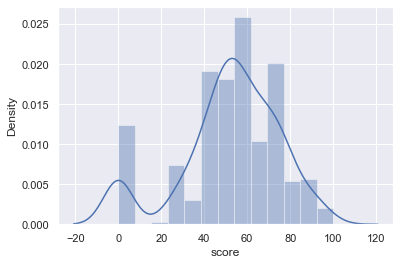

In [18]:
column_analysis(stud['score'])
sns.distplot(stud['score'])

Оценки в пределах значений, указанных в сопровождении к данным. Выбросов нет. 
- 37 строк имеет значение 0 - по каким-то причинам они не сдавали или не сдали госэкзамен (их можно не рассматривать для анализа влияния различных условий).
- большинство получило 50-55 баллов (оценки кратны 5).

Поделим оценки на группы 0 - (0), 1 - (20-30), 2 - (35 - 45), 3 - (50-60), 4 - (65-75), 5 - (80-100) и добавим столбец.

In [19]:
def fn_score_group(score):
    if score == 0:
        return 0
    elif 20 <= score <= 30:
        return 1
    elif 35 <= score <= 45:
        return 2
    elif 50 <= score <= 60:
        return 3
    elif 65 <= score <= 75:
        return 4
    elif 80 <= score:
        return 5


stud['score_group'] = stud['score'].apply(fn_score_group)

In [20]:
display(stud.sample(10))

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,...,higher,internet,romantic,famrel,freetime,goout,health,absences,score,score_group
139,GP,F,15,U,GT3,NaN,4.0,4.0,teacher,teacher,...,yes,yes,NaN,4.0,3.0,2.0,5.0,0.0,75.0,4
353,MS,M,19,R,GT3,T,1.0,1.0,other,other,...,yes,yes,no,4.0,4.0,4.0,5.0,4.0,40.0,2
195,GP,F,17,U,NaN,T,2.0,NaN,services,services,...,yes,yes,yes,NaN,3.0,2.0,5.0,0.0,75.0,4
141,GP,M,16,U,LE3,T,2.0,2.0,services,services,...,yes,NaN,no,2.0,3.0,3.0,2.0,8.0,45.0,2
299,GP,M,18,U,LE3,T,4.0,4.0,teacher,teacher,...,yes,yes,yes,1.0,4.0,2.0,1.0,5.0,80.0,5
375,MS,F,18,R,GT3,T,1.0,1.0,other,other,...,yes,yes,no,4.0,3.0,2.0,4.0,2.0,50.0,3
181,GP,M,16,U,GT3,T,3.0,3.0,services,other,...,NaN,yes,NaN,4.0,2.0,3.0,3.0,2.0,60.0,3
281,GP,M,17,U,LE3,A,3.0,NaN,teacher,services,...,NaN,yes,no,4.0,4.0,4.0,3.0,19.0,50.0,3
381,MS,M,18,R,GT3,T,2.0,1.0,other,other,...,yes,yes,yes,4.0,4.0,3.0,5.0,5.0,35.0,2
369,MS,F,18,R,GT3,T,4.0,4.0,other,teacher,...,yes,yes,yes,3.0,2.0,2.0,5.0,10.0,55.0,3


Формируем датафрейм по группам оценок

In [21]:
score_group_1_5 = stud[stud['score_group'] != 0].copy(
    deep=True)  # Глубокая копия, чтоб не лезли ошибки

In [22]:
score_group_1_5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 350 entries, 0 to 394
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               350 non-null    object 
 1   sex                  350 non-null    object 
 2   age                  350 non-null    int64  
 3   address              336 non-null    object 
 4   famsize              326 non-null    object 
 5   pstatus              309 non-null    object 
 6   medu                 348 non-null    float64
 7   fedu                 329 non-null    float64
 8   mjob                 333 non-null    object 
 9   fjob                 318 non-null    object 
 10  reason               335 non-null    object 
 11  guardian             322 non-null    object 
 12  traveltime           327 non-null    float64
 13  studytime            343 non-null    float64
 14  failures             330 non-null    float64
 15  schoolsup            341 non-null    obj

#### Данные типа float64 не будем преобразовывать в int64. Так легче ориентироваться в сводных таблицах. Они не путаются с группами оценок.

### Работаем с пропусками NaN

Анализируем по score_group_1_5, а правим одинаково score_group_1_5 и stud (так как мы не знаем на какую оценку они бы написали и не можем определить повлиял ли это фактор на них или нет. ориентир наш на тех, у кого есть баллы выше 0). 
PS: stud с заполненными значениями пригодится для формирования итогового датафрейма.  

Если имелись пропуски, то после каждого заполнения будем формировать сводную таблицу, чтоб убедиться, что соотношение показателей не уехало

In [23]:
column_analysis(score_group_1_5['school'])
# Пропусков нет.
pivot_t_score_group('school')

Анализ столбца - school
аббревиатура школы, в которой учится ученик


,school,%
GP,310,88.57
MS,40,11.43


Пропущено: 0 значений, что составляет 0.0 %
-----

Сводная таблица по столбцу - school
аббревиатура школы, в которой учится ученик


score           % GP  % MS
school         GP  MS  All            
score_group                           
1              20   3   23  87.0  13.0
2              58   8   66  87.9  12.1
3             114  17  131  87.0  13.0
4              82   9   91  90.1   9.9
5              36   3   39  92.3   7.7
All           310  40  350  88.6  11.4

In [24]:
column_analysis(score_group_1_5['sex'])
# Пропусков нет.
pivot_t_score_group('sex')

Анализ столбца - sex
пол ученика (F - женский, M - мужской)


,sex,%
F,181,51.71
M,169,48.29


Пропущено: 0 значений, что составляет 0.0 %
-----

Сводная таблица по столбцу - sex
пол ученика (F - женский, M - мужской)


score             % F   % M
sex             F    M  All            
score_group                            
1              17    6   23  73.9  26.1
2              34   32   66  51.5  48.5
3              68   63  131  51.9  48.1
4              47   44   91  51.6  48.4
5              15   24   39  38.5  61.5
All           181  169  350  51.7  48.3

In [25]:
column_analysis(score_group_1_5['age'])
# Пропусков нет.
pivot_t_score_group('age')

Анализ столбца - age
возраст ученика (от 15 до 22)


,age,%
16,95,27.14
17,90,25.71
15,76,21.71
18,69,19.71
19,16,4.57
20,2,0.57
21,1,0.29
22,1,0.29


Пропущено: 0 значений, что составляет 0.0 %
-----

Сводная таблица по столбцу - age
возраст ученика (от 15 до 22)


score                                              % 15  % 16  \
age            15    16    17    18    19   20   21   22  All               
score_group                                                                 
1             5.0   6.0   8.0   4.0   NaN  NaN  NaN  NaN   23  21.7  26.1   
2            10.0  14.0  16.0  18.0   6.0  NaN  1.0  1.0   66  15.2  21.2   
3            28.0  36.0  37.0  24.0   6.0  NaN  NaN  NaN  131  21.4  27.5   
4            22.0  27.0  22.0  15.0   4.0  1.0  NaN  NaN   91  24.2  29.7   
5            11.0  12.0   7.0   8.0   NaN  1.0  NaN  NaN   39  28.2  30.8   
All          76.0  95.0  90.0  69.0  16.0  2.0  1.0  1.0  350  21.7  27.1   

             % 17  % 18 % 19 % 20 % 21 % 22  
age                                          
score_group                                  
1            34.8  17.4  NaN  NaN  NaN  NaN  
2            24.2  27.3  9.1  NaN  1.5  1.5  
3            28.2  18.3  4.6  NaN  NaN  NaN  
4            24.2  16.5  4.4  1.1  NaN  NaN  
5            17.9  20.5  NaN  2.6  NaN  NaN  
All          25.7  19.7  4.6  0.6  0.3  0.3

In [26]:
column_analysis(score_group_1_5['address'])
# Пропусков около 4%.
pivot_t_score_group('address')

Анализ столбца - address
тип адреса ученика (U - городской, R - за городом)


,address,%
U,263,78.27
R,73,21.73


Пропущено: 14 значения, что составляет 4.0 %
-----

Сводная таблица по столбцу - address
тип адреса ученика (U - городской, R - за городом)


score             % R   % U
address         R    U  All            
score_group                            
1               7   15   22  31.8  68.2
2              15   51   66  22.7  77.3
3              32   91  123  26.0  74.0
4              12   75   87  13.8  86.2
5               7   31   38  18.4  81.6
All            73  263  336  21.7  78.3

In [27]:
# 78% проживают в городе. Пропуски заменим на U.
score_group_1_5['address'] = score_group_1_5['address'].fillna('U')
stud['address'] = stud['address'].fillna('U')
pivot_t_score_group('address')

Сводная таблица по столбцу - address
тип адреса ученика (U - городской, R - за городом)


score             % R   % U
address         R    U  All            
score_group                            
1               7   16   23  30.4  69.6
2              15   51   66  22.7  77.3
3              32   99  131  24.4  75.6
4              12   79   91  13.2  86.8
5               7   32   39  17.9  82.1
All            73  277  350  20.9  79.1

In [28]:
column_analysis(score_group_1_5['famsize'])
# Пропусков около 6.9%.
pivot_t_score_group('famsize')

Анализ столбца - famsize
размер семьи(LE3 <= 3, GT3 >3)


,famsize,%
GT3,227,69.63
LE3,99,30.37


Пропущено: 24 значения, что составляет 6.86 %
-----

Сводная таблица по столбцу - famsize
размер семьи(LE3 <= 3, GT3 >3)


score          % GT3 % LE3
famsize       GT3 LE3  All            
score_group                           
1              15   6   21  71.4  28.6
2              43  18   61  70.5  29.5
3              84  37  121  69.4  30.6
4              63  25   88  71.6  28.4
5              22  13   35  62.9  37.1
All           227  99  326  69.6  30.4

In [29]:
# 70% живут в семьях где больше 3 человек (есть братья, сестры), заполним пропуски 'GT3'
score_group_1_5['famsize'] = score_group_1_5['famsize'].fillna('GT3')
stud['famsize'] = stud['famsize'].fillna('GT3')
pivot_t_score_group('famsize')

Сводная таблица по столбцу - famsize
размер семьи(LE3 <= 3, GT3 >3)


score          % GT3 % LE3
famsize       GT3 LE3  All            
score_group                           
1              17   6   23  73.9  26.1
2              48  18   66  72.7  27.3
3              94  37  131  71.8  28.2
4              66  25   91  72.5  27.5
5              26  13   39  66.7  33.3
All           251  99  350  71.7  28.3

In [30]:
column_analysis(score_group_1_5['pstatus'])
# Пропусков 11,7%.
pivot_t_score_group('pstatus')

Анализ столбца - pstatus
статус совместного жилья родителей (T - живут вместе A - раздельно)


,pstatus,%
T,276,89.32
A,33,10.68


Пропущено: 41 значение, что составляет 11.71 %
-----

Сводная таблица по столбцу - pstatus
статус совместного жилья родителей (T - живут вместе A - раздельно)


score             % A   % T
pstatus         A    T  All            
score_group                            
1               3   17   20  15.0  85.0
2               5   54   59   8.5  91.5
3              13  103  116  11.2  88.8
4               7   73   80   8.8  91.2
5               5   29   34  14.7  85.3
All            33  276  309  10.7  89.3

In [31]:
# Заполним пропуски 'T'. По соотношению полных семей 89% к 11% неполных.
score_group_1_5['pstatus'] = score_group_1_5['pstatus'].fillna('T')
stud['pstatus'] = stud['pstatus'].fillna('T')
pivot_t_score_group('pstatus')

Сводная таблица по столбцу - pstatus
статус совместного жилья родителей (T - живут вместе A - раздельно)


score             % A   % T
pstatus         A    T  All            
score_group                            
1               3   20   23  13.0  87.0
2               5   61   66   7.6  92.4
3              13  118  131   9.9  90.1
4               7   84   91   7.7  92.3
5               5   34   39  12.8  87.2
All            33  317  350   9.4  90.6

In [32]:
column_analysis(score_group_1_5['medu'])
# Пропущено 2 значения.
pivot_t_score_group('medu')

Анализ столбца - medu
образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)


,medu,%
4.0,125,35.92
3.0,87,25.00
2.0,86,24.71
1.0,47,13.51
0.0,3,0.86


Пропущено: 2 значения, что составляет 0.57 %
-----

Сводная таблица по столбцу - medu
образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)


score                               % 0.0 % 1.0 % 2.0 % 3.0 % 4.0
medu          0.0   1.0   2.0   3.0    4.0  All                              
score_group                                                                  
1             NaN   4.0   4.0   7.0    7.0   22   NaN  18.2  18.2  31.8  31.8
2             1.0  11.0  17.0  17.0   20.0   66   1.5  16.7  25.8  25.8  30.3
3             NaN  24.0  38.0  33.0   35.0  130   NaN  18.5  29.2  25.4  26.9
4             2.0   6.0  23.0  19.0   41.0   91   2.2   6.6  25.3  20.9  45.1
5             NaN   2.0   4.0  11.0   22.0   39   NaN   5.1  10.3  28.2  56.4
All           3.0  47.0  86.0  87.0  125.0  348   0.9  13.5  24.7  25.0  35.9

In [33]:
# Чаще всего матери имеют высшее образование, заменим на 4.0
score_group_1_5['medu'] = score_group_1_5['medu'].fillna(4.0)
stud['medu'] = stud['medu'].fillna(4.0)
pivot_t_score_group('medu')

Сводная таблица по столбцу - medu
образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)


score                               % 0.0 % 1.0 % 2.0 % 3.0 % 4.0
medu          0.0   1.0   2.0   3.0    4.0  All                              
score_group                                                                  
1             NaN   4.0   4.0   7.0    8.0   23   NaN  17.4  17.4  30.4  34.8
2             1.0  11.0  17.0  17.0   20.0   66   1.5  16.7  25.8  25.8  30.3
3             NaN  24.0  38.0  33.0   36.0  131   NaN  18.3  29.0  25.2  27.5
4             2.0   6.0  23.0  19.0   41.0   91   2.2   6.6  25.3  20.9  45.1
5             NaN   2.0   4.0  11.0   22.0   39   NaN   5.1  10.3  28.2  56.4
All           3.0  47.0  86.0  87.0  127.0  350   0.9  13.4  24.6  24.9  36.3

In [34]:
column_analysis(score_group_1_5['fedu'])
# Пропусков много и они распределены примерно равномерно между рангами 1-4. Конкретным значение заполнить не можем
pivot_t_score_group('fedu')
# Оставим пока

Анализ столбца - fedu
образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)


,fedu,%
2.0,93,28.27
3.0,88,26.75
4.0,81,24.62
1.0,65,19.76
0.0,2,0.61


Пропущено: 21 значение, что составляет 6.0 %
-----

Сводная таблица по столбцу - fedu
образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)


score                              % 0.0 % 1.0 % 2.0 % 3.0 % 4.0
fedu          0.0   1.0   2.0   3.0   4.0  All                              
score_group                                                                 
1             NaN   5.0   7.0   5.0   5.0   22   NaN  22.7  31.8  22.7  22.7
2             NaN  16.0  15.0  20.0   9.0   60   NaN  26.7  25.0  33.3  15.0
3             1.0  27.0  36.0  33.0  28.0  125   0.8  21.6  28.8  26.4  22.4
4             NaN  12.0  27.0  20.0  27.0   86   NaN  14.0  31.4  23.3  31.4
5             1.0   5.0   8.0  10.0  12.0   36   2.8  13.9  22.2  27.8  33.3
All           2.0  65.0  93.0  88.0  81.0  329   0.6  19.8  28.3  26.7  24.6

In [35]:
column_analysis(score_group_1_5['mjob'])
# Пропусков 4.9%.
pivot_t_score_group('mjob')

Анализ столбца - mjob
работа матери (teacher - учитель, health - сфера здравоохранения, services - гос служба, at_home - не работает, other - другое)


,mjob,%
other,115,34.53
services,88,26.43
teacher,51,15.32
at_home,49,14.71
health,30,9.01


Пропущено: 17 значений, что составляет 4.86 %
-----

Сводная таблица по столбцу - mjob
работа матери (teacher - учитель, health - сфера здравоохранения, services - гос служба, at_home - не работает, other - другое)


score                                     % at_home % health  \
mjob        at_home health  other services teacher  All                      
score_group                                                                  
1               5.0    NaN   11.0      5.0     1.0   22      22.7      NaN   
2               8.0    5.0   24.0     14.0    13.0   64      12.5      7.8   
3              21.0    7.0   45.0     36.0    16.0  125      16.8      5.6   
4              13.0   13.0   29.0     20.0    12.0   87      14.9     14.9   
5               2.0    5.0    6.0     13.0     9.0   35       5.7     14.3   
All            49.0   30.0  115.0     88.0    51.0  333      14.7      9.0   

            % other % services % teacher  
mjob                                      
score_group                               
1              50.0       22.7       4.5  
2              37.5       21.9      20.3  
3              36.0       28.8      12.8  
4              33.3       23.0      13.8  
5              17.1       37.1      25.7  
All            34.5       26.4      15.3

In [36]:
# Заполним пропуски 'other' и посмотрим как измениться распределение по группам оценок.
# Значение для группы 5 увеличилось с практически на 80% с 6 до 10
# В остальных группах распределилось нормально. В группе 5 лучше бы их присоединить к 'services'
# Будем иметь это ввиду
score_group_1_5['mjob'] = score_group_1_5['mjob'].fillna('other')
stud['mjob'] = stud['mjob'].fillna('other')
pivot_t_score_group('mjob')

Сводная таблица по столбцу - mjob
работа матери (teacher - учитель, health - сфера здравоохранения, services - гос служба, at_home - не работает, other - другое)


score                                     % at_home % health  \
mjob        at_home health  other services teacher  All                      
score_group                                                                  
1               5.0    NaN   12.0      5.0     1.0   23      21.7      NaN   
2               8.0    5.0   26.0     14.0    13.0   66      12.1      7.6   
3              21.0    7.0   51.0     36.0    16.0  131      16.0      5.3   
4              13.0   13.0   33.0     20.0    12.0   91      14.3     14.3   
5               2.0    5.0   10.0     13.0     9.0   39       5.1     12.8   
All            49.0   30.0  132.0     88.0    51.0  350      14.0      8.6   

            % other % services % teacher  
mjob                                      
score_group                               
1              52.2       21.7       4.3  
2              39.4       21.2      19.7  
3              38.9       27.5      12.2  
4              36.3       22.0      13.2  
5              25.6       33.3      23.1  
All            37.7       25.1      14.6

In [37]:
column_analysis(score_group_1_5['fjob'])
# Пропусков 9.1%
pivot_t_score_group('fjob')

Анализ столбца - fjob
работа отца (teacher - учитель, health - сфера здравоохранения, services - гос служба, at_home - не работает, other - другое)


,fjob,%
other,176,55.35
services,88,27.67
teacher,25,7.86
health,15,4.72
at_home,14,4.40


Пропущено: 32 значения, что составляет 9.14 %
-----

Сводная таблица по столбцу - fjob
работа отца (teacher - учитель, health - сфера здравоохранения, services - гос служба, at_home - не работает, other - другое)


score                                     % at_home % health  \
fjob        at_home health  other services teacher  All                      
score_group                                                                  
1               1.0    NaN   13.0      4.0     2.0   20       5.0      NaN   
2               3.0    6.0   29.0     21.0     2.0   61       4.9      9.8   
3               4.0    3.0   73.0     36.0     7.0  123       3.3      2.4   
4               4.0    5.0   48.0     20.0     6.0   83       4.8      6.0   
5               2.0    1.0   13.0      7.0     8.0   31       6.5      3.2   
All            14.0   15.0  176.0     88.0    25.0  318       4.4      4.7   

            % other % services % teacher  
fjob                                      
score_group                               
1              65.0       20.0      10.0  
2              47.5       34.4       3.3  
3              59.3       29.3       5.7  
4              57.8       24.1       7.2  
5              41.9       22.6      25.8  
All            55.3       27.7       7.9

In [38]:
# Большинство 'other' - заменим на него
score_group_1_5['fjob'] = score_group_1_5['fjob'].fillna('other')
stud['fjob'] = stud['fjob'].fillna('other')
pivot_t_score_group('fjob')

Сводная таблица по столбцу - fjob
работа отца (teacher - учитель, health - сфера здравоохранения, services - гос служба, at_home - не работает, other - другое)


score                                     % at_home % health  \
fjob        at_home health  other services teacher  All                      
score_group                                                                  
1               1.0    NaN   16.0      4.0     2.0   23       4.3      NaN   
2               3.0    6.0   34.0     21.0     2.0   66       4.5      9.1   
3               4.0    3.0   81.0     36.0     7.0  131       3.1      2.3   
4               4.0    5.0   56.0     20.0     6.0   91       4.4      5.5   
5               2.0    1.0   21.0      7.0     8.0   39       5.1      2.6   
All            14.0   15.0  208.0     88.0    25.0  350       4.0      4.3   

            % other % services % teacher  
fjob                                      
score_group                               
1              69.6       17.4       8.7  
2              51.5       31.8       3.0  
3              61.8       27.5       5.3  
4              61.5       22.0       6.6  
5              53.8       17.9      20.5  
All            59.4       25.1       7.1

In [39]:
column_analysis(score_group_1_5['reason'])
# Пропусков 4.3%
pivot_t_score_group('reason')

Анализ столбца - reason
причина выбора школы (home - близость к дому, reputation - репутация школы, course - образовательная программа, other - другое)


,reason,%
course,118,35.22
reputation,96,28.66
home,89,26.57
other,32,9.55


Пропущено: 15 значений, что составляет 4.29 %
-----

Сводная таблица по столбцу - reason
причина выбора школы (home - близость к дому, reputation - репутация школы, course - образовательная программа, other - другое)


score                            % course % home % other  \
reason      course home other reputation  All                           
score_group                                                             
1                8    5     2          7   22     36.4   22.7     9.1   
2               26   15     6         16   63     41.3   23.8     9.5   
3               46   36    11         32  125     36.8   28.8     8.8   
4               24   23    10         30   87     27.6   26.4    11.5   
5               14   10     3         11   38     36.8   26.3     7.9   
All            118   89    32         96  335     35.2   26.6     9.6   

            % reputation  
reason                    
score_group               
1                   31.8  
2                   25.4  
3                   25.6  
4                   34.5  
5                   28.9  
All                 28.7

In [40]:
score_group_1_5['reason'] = score_group_1_5['reason'].fillna('course')
stud['reason'] = stud['reason'].fillna('course')
pivot_t_score_group('reason')

Сводная таблица по столбцу - reason
причина выбора школы (home - близость к дому, reputation - репутация школы, course - образовательная программа, other - другое)


score                            % course % home % other  \
reason      course home other reputation  All                           
score_group                                                             
1                9    5     2          7   23     39.1   21.7     8.7   
2               29   15     6         16   66     43.9   22.7     9.1   
3               52   36    11         32  131     39.7   27.5     8.4   
4               28   23    10         30   91     30.8   25.3    11.0   
5               15   10     3         11   39     38.5   25.6     7.7   
All            133   89    32         96  350     38.0   25.4     9.1   

            % reputation  
reason                    
score_group               
1                   30.4  
2                   24.2  
3                   24.4  
4                   33.0  
5                   28.2  
All                 27.4

In [41]:
column_analysis(score_group_1_5['guardian'])
# Пропусков 8%
pivot_t_score_group('guardian')

Анализ столбца - guardian
опекун ("mother" - мать, "father" - отец, "other" - другое)


,guardian,%
mother,224,69.57
father,78,24.22
other,20,6.21


Пропущено: 28 значений, что составляет 8.0 %
-----

Сводная таблица по столбцу - guardian
опекун ("mother" - мать, "father" - отец, "other" - другое)


score                   % father % mother % other
guardian    father mother other  All                          
score_group                                                   
1              5.0   18.0   NaN   23     21.7     78.3     NaN
2             11.0   43.0   7.0   61     18.0     70.5    11.5
3             31.0   77.0   7.0  115     27.0     67.0     6.1
4             21.0   59.0   4.0   84     25.0     70.2     4.8
5             10.0   27.0   2.0   39     25.6     69.2     5.1
All           78.0  224.0  20.0  322     24.2     69.6     6.2

In [42]:
# Заменим на mother - она у всех в приоритете
score_group_1_5['guardian'] = score_group_1_5['guardian'].fillna('mother')
stud['guardian'] = stud['guardian'].fillna('mother')
pivot_t_score_group('guardian')

Сводная таблица по столбцу - guardian
опекун ("mother" - мать, "father" - отец, "other" - другое)


score                   % father % mother % other
guardian    father mother other  All                          
score_group                                                   
1              5.0   18.0   NaN   23     21.7     78.3     NaN
2             11.0   48.0   7.0   66     16.7     72.7    10.6
3             31.0   93.0   7.0  131     23.7     71.0     5.3
4             21.0   66.0   4.0   91     23.1     72.5     4.4
5             10.0   27.0   2.0   39     25.6     69.2     5.1
All           78.0  252.0  20.0  350     22.3     72.0     5.7

In [43]:
column_analysis(score_group_1_5['traveltime'])
# Пропусков 6,6%
pivot_t_score_group('traveltime')

Анализ столбца - traveltime
время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)


,traveltime,%
1.0,217,66.36
2.0,86,26.30
3.0,17,5.20
4.0,7,2.14


Пропущено: 23 значения, что составляет 6.57 %
-----

Сводная таблица по столбцу - traveltime
время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)


score                       % 1.0 % 2.0 % 3.0 % 4.0
traveltime     1.0   2.0   3.0  4.0  All                        
score_group                                                     
1             15.0   4.0   1.0  NaN   20  75.0  20.0   5.0   NaN
2             41.0  19.0   2.0  2.0   64  64.1  29.7   3.1   3.1
3             74.0  35.0   8.0  4.0  121  61.2  28.9   6.6   3.3
4             61.0  19.0   5.0  1.0   86  70.9  22.1   5.8   1.2
5             26.0   9.0   1.0  NaN   36  72.2  25.0   2.8   NaN
All          217.0  86.0  17.0  7.0  327  66.4  26.3   5.2   2.1

In [44]:
# Во всех группах большинство детей живут близко от школы - заменим на 1.0
score_group_1_5['traveltime'] = score_group_1_5['traveltime'].fillna(1.0)
stud['traveltime'] = stud['traveltime'].fillna(1.0)
pivot_t_score_group('traveltime')

Сводная таблица по столбцу - traveltime
время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)


score                       % 1.0 % 2.0 % 3.0 % 4.0
traveltime     1.0   2.0   3.0  4.0  All                        
score_group                                                     
1             18.0   4.0   1.0  NaN   23  78.3  17.4   4.3   NaN
2             43.0  19.0   2.0  2.0   66  65.2  28.8   3.0   3.0
3             84.0  35.0   8.0  4.0  131  64.1  26.7   6.1   3.1
4             66.0  19.0   5.0  1.0   91  72.5  20.9   5.5   1.1
5             29.0   9.0   1.0  NaN   39  74.4  23.1   2.6   NaN
All          240.0  86.0  17.0  7.0  350  68.6  24.6   4.9   2.0

In [45]:
column_analysis(score_group_1_5['studytime'])
# Пропусков 2%
pivot_t_score_group('studytime')

Анализ столбца - studytime
время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)


,studytime,%
2.0,171,49.85
1.0,90,26.24
3.0,58,16.91
4.0,24,7.00


Пропущено: 7 значений, что составляет 2.0 %
-----

Сводная таблица по столбцу - studytime
время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)


score                         % 1.0 % 2.0 % 3.0 % 4.0
studytime     1.0    2.0   3.0   4.0  All                        
score_group                                                      
1             7.0   15.0   NaN   1.0   23  30.4  65.2   NaN   4.3
2            17.0   36.0  10.0   3.0   66  25.8  54.5  15.2   4.5
3            34.0   66.0  20.0   8.0  128  26.6  51.6  15.6   6.2
4            23.0   40.0  19.0   7.0   89  25.8  44.9  21.3   7.9
5             9.0   14.0   9.0   5.0   37  24.3  37.8  24.3  13.5
All          90.0  171.0  58.0  24.0  343  26.2  49.9  16.9   7.0

In [46]:
# Во всех группах большинство детей тратят время на доп учебу 2-5 ч. - заменим на 2.0
score_group_1_5['studytime'] = score_group_1_5['studytime'].fillna(2.0)
stud['studytime'] = stud['studytime'].fillna(2.0)
pivot_t_score_group('studytime')

Сводная таблица по столбцу - studytime
время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)


score                         % 1.0 % 2.0 % 3.0 % 4.0
studytime     1.0    2.0   3.0   4.0  All                        
score_group                                                      
1             7.0   15.0   NaN   1.0   23  30.4  65.2   NaN   4.3
2            17.0   36.0  10.0   3.0   66  25.8  54.5  15.2   4.5
3            34.0   69.0  20.0   8.0  131  26.0  52.7  15.3   6.1
4            23.0   42.0  19.0   7.0   91  25.3  46.2  20.9   7.7
5             9.0   16.0   9.0   5.0   39  23.1  41.0  23.1  12.8
All          90.0  178.0  58.0  24.0  350  25.7  50.9  16.6   6.9

In [47]:
column_analysis(score_group_1_5['failures'])
# Пропусков 5.7%
pivot_t_score_group('failures')

Анализ столбца - failures
количество внеучебных неудач (n, если 1<=n<=3, иначе 0)


,failures,%
0.0,272,82.42
1.0,38,11.52
2.0,10,3.03
3.0,10,3.03


Пропущено: 20 значений, что составляет 5.71 %
-----

Сводная таблица по столбцу - failures
количество внеучебных неудач (n, если 1<=n<=3, иначе 0)


score                        % 0.0 % 1.0 % 2.0 % 3.0
failures       0.0   1.0   2.0   3.0  All                        
score_group                                                      
1             18.0   2.0   2.0   1.0   23  78.3   8.7   8.7   4.3
2             38.0  14.0   5.0   5.0   62  61.3  22.6   8.1   8.1
3            106.0  15.0   1.0   4.0  126  84.1  11.9   0.8   3.2
4             76.0   6.0   2.0   NaN   84  90.5   7.1   2.4   NaN
5             34.0   1.0   NaN   NaN   35  97.1   2.9   NaN   NaN
All          272.0  38.0  10.0  10.0  330  82.4  11.5   3.0   3.0

In [48]:
score_group_1_5['failures'] = score_group_1_5['failures'].fillna(0)
stud['failures'] = stud['failures'].fillna(0)
pivot_t_score_group('failures')

Сводная таблица по столбцу - failures
количество внеучебных неудач (n, если 1<=n<=3, иначе 0)


score                        % 0.0 % 1.0 % 2.0 % 3.0
failures       0.0   1.0   2.0   3.0  All                        
score_group                                                      
1             18.0   2.0   2.0   1.0   23  78.3   8.7   8.7   4.3
2             42.0  14.0   5.0   5.0   66  63.6  21.2   7.6   7.6
3            111.0  15.0   1.0   4.0  131  84.7  11.5   0.8   3.1
4             83.0   6.0   2.0   NaN   91  91.2   6.6   2.2   NaN
5             38.0   1.0   NaN   NaN   39  97.4   2.6   NaN   NaN
All          292.0  38.0  10.0  10.0  350  83.4  10.9   2.9   2.9

In [49]:
column_analysis(score_group_1_5['schoolsup'])
# Пропусков 2.6%
pivot_t_score_group('schoolsup')

Анализ столбца - schoolsup
дополнительная образовательная поддержка


,schoolsup,%
no,294,86.22
yes,47,13.78


Пропущено: 9 значений, что составляет 2.57 %
-----

Сводная таблица по столбцу - schoolsup
дополнительная образовательная поддержка


score              % no % yes
schoolsup       no   yes  All             
score_group                               
1             13.0   8.0   21   61.9  38.1
2             49.0  14.0   63   77.8  22.2
3            109.0  21.0  130   83.8  16.2
4             84.0   4.0   88   95.5   4.5
5             39.0   NaN   39  100.0   NaN
All          294.0  47.0  341   86.2  13.8

In [50]:
score_group_1_5['schoolsup'] = score_group_1_5['schoolsup'].fillna('no')
stud['schoolsup'] = stud['schoolsup'].fillna('no')
pivot_t_score_group('schoolsup')

Сводная таблица по столбцу - schoolsup
дополнительная образовательная поддержка


score              % no % yes
schoolsup       no   yes  All             
score_group                               
1             15.0   8.0   23   65.2  34.8
2             52.0  14.0   66   78.8  21.2
3            110.0  21.0  131   84.0  16.0
4             87.0   4.0   91   95.6   4.4
5             39.0   NaN   39  100.0   NaN
All          303.0  47.0  350   86.6  13.4

In [51]:
column_analysis(score_group_1_5['famsup'])
# Пропусков 10%
pivot_t_score_group('famsup')

Анализ столбца - famsup
семейная образовательная поддержка


,famsup,%
yes,195,61.9
no,120,38.1


Пропущено: 35 значений, что составляет 10.0 %
-----

Сводная таблица по столбцу - famsup
семейная образовательная поддержка


score            % no % yes
famsup         no  yes  All            
score_group                            
1               5   17   22  22.7  77.3
2              23   38   61  37.7  62.3
3              45   70  115  39.1  60.9
4              34   47   81  42.0  58.0
5              13   23   36  36.1  63.9
All           120  195  315  38.1  61.9

In [52]:
# А вот семейной образовательной поддержкой пользуется большинство учащихся - заменим на yes
score_group_1_5['famsup'] = score_group_1_5['famsup'].fillna('yes')
stud['famsup'] = stud['famsup'].fillna('yes')
pivot_t_score_group('famsup')

Сводная таблица по столбцу - famsup
семейная образовательная поддержка


score            % no % yes
famsup         no  yes  All            
score_group                            
1               5   18   23  21.7  78.3
2              23   43   66  34.8  65.2
3              45   86  131  34.4  65.6
4              34   57   91  37.4  62.6
5              13   26   39  33.3  66.7
All           120  230  350  34.3  65.7

In [53]:
column_analysis(score_group_1_5['paid'])
# Пропусков 10.3%
pivot_t_score_group('paid')

Анализ столбца - paid
дополнительные платные занятия по математике


,paid,%
no,169,53.82
yes,145,46.18


Пропущено: 36 значений, что составляет 10.29 %
-----

Сводная таблица по столбцу - paid
дополнительные платные занятия по математике


score            % no % yes
paid           no  yes  All            
score_group                            
1              13    7   20  65.0  35.0
2              30   29   59  50.8  49.2
3              63   54  117  53.8  46.2
4              39   43   82  47.6  52.4
5              24   12   36  66.7  33.3
All           169  145  314  53.8  46.2

In [54]:
# В данном вопросе дополнительные платные занятия больше берут те, кто учиться средне - 2-4 группы.
# А вот те, кто учиться плохо или отлично реже пользуются данной услугой.
# Процент пропусков большой и конкретно отнести на какую-либо группу не получится

In [55]:
column_analysis(score_group_1_5['activities'])
# Пропусков 3.4%
pivot_t_score_group('activities')

Анализ столбца - activities
дополнительные внеучебные занятия


,activities,%
yes,172,50.89
no,166,49.11


Пропущено: 12 значения, что составляет 3.43 %
-----

Сводная таблица по столбцу - activities
дополнительные внеучебные занятия


score            % no % yes
activities     no  yes  All            
score_group                            
1              15    8   23  65.2  34.8
2              30   33   63  47.6  52.4
3              61   65  126  48.4  51.6
4              42   45   87  48.3  51.7
5              18   21   39  46.2  53.8
All           166  172  338  49.1  50.9

In [56]:
# Дополнительными внеучебными занятиями занимаются примерно половина учеников со 2 по 5 группу, а в 1 только 35%
# Заменим на yes
score_group_1_5['activities'] = score_group_1_5['activities'].fillna('yes')
stud['activities'] = stud['activities'].fillna('yes')
pivot_t_score_group('activities')
# Распределилось примерно равномерно со 2 по 5 группу. А первая группа соотношение не изменилось

Сводная таблица по столбцу - activities
дополнительные внеучебные занятия


score            % no % yes
activities     no  yes  All            
score_group                            
1              15    8   23  65.2  34.8
2              30   36   66  45.5  54.5
3              61   70  131  46.6  53.4
4              42   49   91  46.2  53.8
5              18   21   39  46.2  53.8
All           166  184  350  47.4  52.6

In [57]:
column_analysis(score_group_1_5['nursery'])
# Пропусков 3.4%
pivot_t_score_group('nursery')

Анализ столбца - nursery
посещал детский сад


,nursery,%
yes,270,79.88
no,68,20.12


Пропущено: 12 значения, что составляет 3.43 %
-----

Сводная таблица по столбцу - nursery
посещал детский сад


score            % no % yes
nursery        no  yes  All            
score_group                            
1               3   20   23  13.0  87.0
2              13   52   65  20.0  80.0
3              32   94  126  25.4  74.6
4              16   72   88  18.2  81.8
5               4   32   36  11.1  88.9
All            68  270  338  20.1  79.9

In [58]:
# Заменим на yes - по большенству
score_group_1_5['nursery'] = score_group_1_5['nursery'].fillna('yes')
stud['nursery'] = stud['nursery'].fillna('yes')
pivot_t_score_group('nursery')

Сводная таблица по столбцу - nursery
посещал детский сад


score            % no % yes
nursery        no  yes  All            
score_group                            
1               3   20   23  13.0  87.0
2              13   53   66  19.7  80.3
3              32   99  131  24.4  75.6
4              16   75   91  17.6  82.4
5               4   35   39  10.3  89.7
All            68  282  350  19.4  80.6

In [59]:
column_analysis(score_group_1_5['higher'])
# Пропусков 5.4%
pivot_t_score_group('higher')

Анализ столбца - higher
хочет получить высшее образование)


,higher,%
yes,318,96.07
no,13,3.93


Пропущено: 19 значений, что составляет 5.43 %
-----

Сводная таблица по столбцу - higher
хочет получить высшее образование)


score             % no  % yes
higher         no    yes  All            
score_group                              
1             NaN   23.0   23  NaN  100.0
2             6.0   57.0   63  9.5   90.5
3             6.0  116.0  122  4.9   95.1
4             1.0   84.0   85  1.2   98.8
5             NaN   38.0   38  NaN  100.0
All          13.0  318.0  331  3.9   96.1

In [60]:
# Заменим на yes - по большенству
score_group_1_5['higher'] = score_group_1_5['higher'].fillna('yes')
stud['higher'] = stud['higher'].fillna('yes')
pivot_t_score_group('higher')

Сводная таблица по столбцу - higher
хочет получить высшее образование)


score             % no  % yes
higher         no    yes  All            
score_group                              
1             NaN   23.0   23  NaN  100.0
2             6.0   60.0   66  9.1   90.9
3             6.0  125.0  131  4.6   95.4
4             1.0   90.0   91  1.1   98.9
5             NaN   39.0   39  NaN  100.0
All          13.0  337.0  350  3.7   96.3

In [61]:
column_analysis(score_group_1_5['studytime, granular'])
# Пропусков 2%
pivot_t_score_group('studytime, granular')

Анализ столбца - studytime, granular
пока неизвесно


,"studytime, granular",%
-6.0,171,49.85
-3.0,90,26.24
-9.0,58,16.91
-12.0,24,7.00


Пропущено: 7 значений, что составляет 2.0 %
-----

Сводная таблица по столбцу - studytime, granular
пока неизвесно


score                         % -12.0 % -9.0 % -6.0 % -3.0
studytime, granular -12.0  -9.0   -6.0  -3.0  All                             
score_group                                                                   
1                     1.0   NaN   15.0   7.0   23     4.3    NaN   65.2   30.4
2                     3.0  10.0   36.0  17.0   66     4.5   15.2   54.5   25.8
3                     8.0  20.0   66.0  34.0  128     6.2   15.6   51.6   26.6
4                     7.0  19.0   40.0  23.0   89     7.9   21.3   44.9   25.8
5                     5.0   9.0   14.0   9.0   37    13.5   24.3   37.8   24.3
All                  24.0  58.0  171.0  90.0  343     7.0   16.9   49.9   26.2

In [62]:
# Заменим на -6.0 - по большенству
score_group_1_5['studytime, granular'] = score_group_1_5['studytime, granular'].fillna(-6.0)
stud['studytime, granular'] = stud['studytime, granular'].fillna(-6.0)
pivot_t_score_group('studytime, granular')

Сводная таблица по столбцу - studytime, granular
пока неизвесно


score                         % -12.0 % -9.0 % -6.0 % -3.0
studytime, granular -12.0  -9.0   -6.0  -3.0  All                             
score_group                                                                   
1                     1.0   NaN   15.0   7.0   23     4.3    NaN   65.2   30.4
2                     3.0  10.0   36.0  17.0   66     4.5   15.2   54.5   25.8
3                     8.0  20.0   69.0  34.0  131     6.1   15.3   52.7   26.0
4                     7.0  19.0   42.0  23.0   91     7.7   20.9   46.2   25.3
5                     5.0   9.0   16.0   9.0   39    12.8   23.1   41.0   23.1
All                  24.0  58.0  178.0  90.0  350     6.9   16.6   50.9   25.7

In [63]:
column_analysis(score_group_1_5['internet'])
# Пропусков 8,3%
pivot_t_score_group('internet')

Анализ столбца - internet
наличие интернета дома


,internet,%
yes,273,85.05
no,48,14.95


Пропущено: 29 значений, что составляет 8.29 %
-----

Сводная таблица по столбцу - internet
наличие интернета дома


score            % no % yes
internet       no  yes  All            
score_group                            
1               3   17   20  15.0  85.0
2              10   52   62  16.1  83.9
3              22   98  120  18.3  81.7
4              10   73   83  12.0  88.0
5               3   33   36   8.3  91.7
All            48  273  321  15.0  85.0

In [64]:
# Заменим на yes - по большенству
score_group_1_5['internet'] = score_group_1_5['internet'].fillna('yes')
stud['internet'] = stud['internet'].fillna('yes')
pivot_t_score_group('internet')

Сводная таблица по столбцу - internet
наличие интернета дома


score            % no % yes
internet       no  yes  All            
score_group                            
1               3   20   23  13.0  87.0
2              10   56   66  15.2  84.8
3              22  109  131  16.8  83.2
4              10   81   91  11.0  89.0
5               3   36   39   7.7  92.3
All            48  302  350  13.7  86.3

In [65]:
column_analysis(score_group_1_5['romantic'])
# Пропусков 8,3%
pivot_t_score_group('romantic')

Анализ столбца - romantic
в романтических отношениях


,romantic,%
no,217,67.6
yes,104,32.4


Пропущено: 29 значений, что составляет 8.29 %
-----

Сводная таблица по столбцу - romantic
в романтических отношениях


score            % no % yes
romantic       no  yes  All            
score_group                            
1              16    5   21  76.2  23.8
2              36   26   62  58.1  41.9
3              82   36  118  69.5  30.5
4              54   28   82  65.9  34.1
5              29    9   38  76.3  23.7
All           217  104  321  67.6  32.4

In [66]:
# Заменим на no - по большенству
score_group_1_5['romantic'] = score_group_1_5['romantic'].fillna('no')
stud['romantic'] = stud['romantic'].fillna('no')
pivot_t_score_group('romantic')

Сводная таблица по столбцу - romantic
в романтических отношениях


score            % no % yes
romantic       no  yes  All            
score_group                            
1              18    5   23  78.3  21.7
2              40   26   66  60.6  39.4
3              95   36  131  72.5  27.5
4              63   28   91  69.2  30.8
5              30    9   39  76.9  23.1
All           246  104  350  70.3  29.7

In [67]:
column_analysis(score_group_1_5['famrel'])
# Пропусков 6.7%
pivot_t_score_group('famrel')

Анализ столбца - famrel
семейные отношения (от 1 - очень плохо до 5 - очень хорошо)


,famrel,%
4.0,163,50.00
5.0,87,26.69
3.0,56,17.18
2.0,13,3.99
1.0,7,2.15


Пропущено: 24 значения, что составляет 6.86 %
-----

Сводная таблица по столбцу - famrel
семейные отношения (от 1 - очень плохо до 5 - очень хорошо)


score                               % 1.0 % 2.0 % 3.0 % 4.0 % 5.0
famrel        1.0   2.0   3.0    4.0   5.0  All                              
score_group                                                                  
1             NaN   1.0   4.0   11.0   5.0   21   NaN   4.8  19.0  52.4  23.8
2             1.0   3.0  12.0   33.0  11.0   60   1.7   5.0  20.0  55.0  18.3
3             3.0   4.0  20.0   66.0  33.0  126   2.4   3.2  15.9  52.4  26.2
4             2.0   4.0  16.0   35.0  24.0   81   2.5   4.9  19.8  43.2  29.6
5             1.0   1.0   4.0   18.0  14.0   38   2.6   2.6  10.5  47.4  36.8
All           7.0  13.0  56.0  163.0  87.0  326   2.1   4.0  17.2  50.0  26.7

In [68]:
# Заменим на 4.0 - по большенству
score_group_1_5['famrel'] = score_group_1_5['famrel'].fillna(4.0)
stud['famrel'] = stud['famrel'].fillna(4.0)
pivot_t_score_group('famrel')

Сводная таблица по столбцу - famrel
семейные отношения (от 1 - очень плохо до 5 - очень хорошо)


score                               % 1.0 % 2.0 % 3.0 % 4.0 % 5.0
famrel        1.0   2.0   3.0    4.0   5.0  All                              
score_group                                                                  
1             NaN   1.0   4.0   13.0   5.0   23   NaN   4.3  17.4  56.5  21.7
2             1.0   3.0  12.0   39.0  11.0   66   1.5   4.5  18.2  59.1  16.7
3             3.0   4.0  20.0   71.0  33.0  131   2.3   3.1  15.3  54.2  25.2
4             2.0   4.0  16.0   45.0  24.0   91   2.2   4.4  17.6  49.5  26.4
5             1.0   1.0   4.0   19.0  14.0   39   2.6   2.6  10.3  48.7  35.9
All           7.0  13.0  56.0  187.0  87.0  350   2.0   3.7  16.0  53.4  24.9

In [69]:
column_analysis(score_group_1_5['freetime'])
# Пропусков 2.3%
pivot_t_score_group('freetime')

Анализ столбца - freetime
свободное время после школы (от 1 - очень мало до 5 - очень мого)


,freetime,%
3.0,131,38.30
4.0,102,29.82
2.0,59,17.25
5.0,34,9.94
1.0,16,4.68


Пропущено: 8 значений, что составляет 2.29 %
-----

Сводная таблица по столбцу - freetime
свободное время после школы (от 1 - очень мало до 5 - очень мого)


score                        % 1.0 % 2.0 % 3.0 % 4.0 % 5.0
freetime      1.0 2.0  3.0  4.0 5.0  All                              
score_group                                                           
1               1   2   10    6   4   23   4.3   8.7  43.5  26.1  17.4
2               4   9   24   25   3   65   6.2  13.8  36.9  38.5   4.6
3               7  22   52   34  14  129   5.4  17.1  40.3  26.4  10.9
4               2  18   35   27   6   88   2.3  20.5  39.8  30.7   6.8
5               2   8   10   10   7   37   5.4  21.6  27.0  27.0  18.9
All            16  59  131  102  34  342   4.7  17.3  38.3  29.8   9.9

In [70]:
# Заменим на 3.0 - по большенству
score_group_1_5['freetime'] = score_group_1_5['freetime'].fillna(3.0)
stud['freetime'] = stud['freetime'].fillna(3.0)
pivot_t_score_group('freetime')

Сводная таблица по столбцу - freetime
свободное время после школы (от 1 - очень мало до 5 - очень мого)


score                        % 1.0 % 2.0 % 3.0 % 4.0 % 5.0
freetime      1.0 2.0  3.0  4.0 5.0  All                              
score_group                                                           
1               1   2   10    6   4   23   4.3   8.7  43.5  26.1  17.4
2               4   9   25   25   3   66   6.1  13.6  37.9  37.9   4.5
3               7  22   54   34  14  131   5.3  16.8  41.2  26.0  10.7
4               2  18   38   27   6   91   2.2  19.8  41.8  29.7   6.6
5               2   8   12   10   7   39   5.1  20.5  30.8  25.6  17.9
All            16  59  139  102  34  350   4.6  16.9  39.7  29.1   9.7

In [71]:
column_analysis(score_group_1_5['goout'])
# Пропусков 1.7%
pivot_t_score_group('goout')

Анализ столбца - goout
проведение времени с друзьями (от 1 - очень мало до 5 - очень много)


,goout,%
3.0,118,34.30
2.0,92,26.74
4.0,73,21.22
5.0,43,12.50
1.0,18,5.23


Пропущено: 6 значений, что составляет 1.71 %
-----

Сводная таблица по столбцу - goout
проведение времени с друзьями (от 1 - очень мало до 5 - очень много)


score                       % 1.0 % 2.0 % 3.0 % 4.0 % 5.0
goout         1.0 2.0  3.0 4.0 5.0  All                              
score_group                                                          
1               1   3    6   6   6   22   4.5  13.6  27.3  27.3  27.3
2               1  12   21  21  10   65   1.5  18.5  32.3  32.3  15.4
3              10  37   43  22  16  128   7.8  28.9  33.6  17.2  12.5
4               4  26   36  20   5   91   4.4  28.6  39.6  22.0   5.5
5               2  14   12   4   6   38   5.3  36.8  31.6  10.5  15.8
All            18  92  118  73  43  344   5.2  26.7  34.3  21.2  12.5

In [72]:
# Заменим на 3.0 - средняя и по большенству
score_group_1_5['goout'] = score_group_1_5['goout'].fillna(3.0)
stud['goout'] = stud['goout'].fillna(3.0)
pivot_t_score_group('goout')

Сводная таблица по столбцу - goout
проведение времени с друзьями (от 1 - очень мало до 5 - очень много)


score                       % 1.0 % 2.0 % 3.0 % 4.0 % 5.0
goout         1.0 2.0  3.0 4.0 5.0  All                              
score_group                                                          
1               1   3    7   6   6   23   4.3  13.0  30.4  26.1  26.1
2               1  12   22  21  10   66   1.5  18.2  33.3  31.8  15.2
3              10  37   46  22  16  131   7.6  28.2  35.1  16.8  12.2
4               4  26   36  20   5   91   4.4  28.6  39.6  22.0   5.5
5               2  14   13   4   6   39   5.1  35.9  33.3  10.3  15.4
All            18  92  124  73  43  350   5.1  26.3  35.4  20.9  12.3

In [73]:
column_analysis(score_group_1_5['health'])
# Пропусков 3.7%
pivot_t_score_group('health')

Анализ столбца - health
текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)


,health,%
5.0,124,36.80
3.0,80,23.74
4.0,52,15.43
1.0,45,13.35
2.0,36,10.68


Пропущено: 13 значения, что составляет 3.71 %
-----

Сводная таблица по столбцу - health
текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)


score                       % 1.0 % 2.0 % 3.0 % 4.0 % 5.0
health        1.0 2.0 3.0 4.0  5.0  All                              
score_group                                                          
1               3   3   5   2    9   22  13.6  13.6  22.7   9.1  40.9
2               5   4  18  13   24   64   7.8   6.2  28.1  20.3  37.5
3              13  11  38  18   44  124  10.5   8.9  30.6  14.5  35.5
4              17  12  13  11   35   88  19.3  13.6  14.8  12.5  39.8
5               7   6   6   8   12   39  17.9  15.4  15.4  20.5  30.8
All            45  36  80  52  124  337  13.4  10.7  23.7  15.4  36.8

In [74]:
# Заменим на 53.0 - по большенству
score_group_1_5['health'] = score_group_1_5['health'].fillna(5.0)
stud['health'] = stud['health'].fillna(5.0)
pivot_t_score_group('health')

Сводная таблица по столбцу - health
текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)


score                       % 1.0 % 2.0 % 3.0 % 4.0 % 5.0
health        1.0 2.0 3.0 4.0  5.0  All                              
score_group                                                          
1               3   3   5   2   10   23  13.0  13.0  21.7   8.7  43.5
2               5   4  18  13   26   66   7.6   6.1  27.3  19.7  39.4
3              13  11  38  18   51  131   9.9   8.4  29.0  13.7  38.9
4              17  12  13  11   38   91  18.7  13.2  14.3  12.1  41.8
5               7   6   6   8   12   39  17.9  15.4  15.4  20.5  30.8
All            45  36  80  52  137  350  12.9  10.3  22.9  14.9  39.1

In [75]:
column_analysis(score_group_1_5['absences'])
# Пропусков 2.9%

pivot = pd.pivot_table(score_group_1_5, index=[
    'score_group'], values=['absences'], aggfunc='median', margins=True)
pivot

Анализ столбца - absences
количество пропущенных занятий


,absences,%
0.0,74,21.76
2.0,60,17.65
4.0,52,15.29
6.0,30,8.82
8.0,20,5.88
10.0,17,5.00
12.0,12,3.53
14.0,12,3.53
3.0,7,2.06
16.0,7,2.06


Пропущено: 10 значений, что составляет 2.86 %
-----



,absences
score_group,
1,8.0
2,5.5
3,4.0
4,4.0
5,2.0
All,4.0


In [76]:
# Пропуски заполним медианой
score_group_1_5['absences'] = score_group_1_5['absences'].fillna(
    score_group_1_5['absences'].median())
stud['absences'] = stud['absences'].fillna(
    score_group_1_5['absences'].median())
pivot = pd.pivot_table(score_group_1_5, index=[
    'score_group'], values=['absences'], aggfunc='median', margins=True)
pivot

,absences
score_group,
1,8.0
2,5.0
3,4.0
4,4.0
5,3.0
All,4.0


In [77]:
column_analysis(score_group_1_5['score'])
pivot = pd.pivot_table(score_group_1_5, index=[
    'score_group'], values=['score'], aggfunc='count', margins=True)
pivot

Анализ столбца - score
баллы по госэкзамену по математике


,score,%
50.0,54,15.43
55.0,46,13.14
75.0,33,9.43
60.0,31,8.86
65.0,31,8.86
40.0,31,8.86
70.0,27,7.71
45.0,26,7.43
80.0,16,4.57
30.0,15,4.29


Пропущено: 0 значений, что составляет 0.0 %
-----



,score
score_group,
1,23
2,66
3,131
4,91
5,39
All,350


In [78]:
# Заполнили все пропуски. Остались только 2 столбца. Но там просто так не получится заполнить без искажения результата.
score_group_1_5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 350 entries, 0 to 394
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               350 non-null    object 
 1   sex                  350 non-null    object 
 2   age                  350 non-null    int64  
 3   address              350 non-null    object 
 4   famsize              350 non-null    object 
 5   pstatus              350 non-null    object 
 6   medu                 350 non-null    float64
 7   fedu                 329 non-null    float64
 8   mjob                 350 non-null    object 
 9   fjob                 350 non-null    object 
 10  reason               350 non-null    object 
 11  guardian             350 non-null    object 
 12  traveltime           350 non-null    float64
 13  studytime            350 non-null    float64
 14  failures             350 non-null    float64
 15  schoolsup            350 non-null    obj

In [79]:
stud.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 387 entries, 0 to 394
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               387 non-null    object 
 1   sex                  387 non-null    object 
 2   age                  387 non-null    int64  
 3   address              387 non-null    object 
 4   famsize              387 non-null    object 
 5   pstatus              387 non-null    object 
 6   medu                 387 non-null    float64
 7   fedu                 363 non-null    float64
 8   mjob                 387 non-null    object 
 9   fjob                 387 non-null    object 
 10  reason               387 non-null    object 
 11  guardian             387 non-null    object 
 12  traveltime           387 non-null    float64
 13  studytime            387 non-null    float64
 14  failures             387 non-null    float64
 15  schoolsup            387 non-null    obj

## Далее проводим анализ: как разные условия оказывают влияние на успеваемость.

### Посмотрим коэффициент корреляции и сводные таблицы по числовым столбцам.

Есть ли между ними взаимосвязь и какая. 
В основном они у нас ранговые (от меньшего к большему, от худшего к лучшему), кроме пропусков занятий (фактическое количество пропусков).  
Нас в основном интересует связь всех столбцов со столбцом score

In [80]:
score_group_1_5.corr()

,age,medu,fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score,score_group
age,1.000000,-0.122434,-0.126771,0.104442,-0.011048,0.220280,0.011048,0.058948,-0.012594,0.116367,-0.058608,0.208898,-0.125073,-0.109404
medu,-0.122434,1.000000,0.599744,-0.162585,0.065412,-0.204391,-0.065412,-0.011706,0.021132,0.074080,-0.060212,0.073881,0.181312,0.167633
fedu,-0.126771,0.599744,1.000000,-0.136114,-0.010575,-0.261092,0.010575,-0.012114,-0.026550,0.047734,-0.006876,0.025069,0.132700,0.117425
traveltime,0.104442,-0.162585,-0.136114,1.000000,-0.098504,0.088629,0.098504,-0.032285,-0.016317,0.037284,-0.016617,0.003958,-0.071340,-0.039570
studytime,-0.011048,0.065412,-0.010575,-0.098504,1.000000,-0.148758,-1.000000,0.054888,-0.126713,-0.029956,-0.072956,-0.076900,0.140438,0.123746
failures,0.220280,-0.204391,-0.261092,0.088629,-0.148758,1.000000,0.148758,-0.015368,0.112350,0.115864,0.058493,0.131315,-0.283415,-0.246947
"studytime, granular",0.011048,-0.065412,0.010575,0.098504,-1.000000,0.148758,1.000000,-0.054888,0.126713,0.029956,0.072956,0.076900,-0.140438,-0.123746
famrel,0.058948,-0.011706,-0.012114,-0.032285,0.054888,-0.015368,-0.054888,1.000000,0.146775,0.029129,0.110954,-0.053219,0.053346,0.058312
freetime,-0.012594,0.021132,-0.026550,-0.016317,-0.126713,0.112350,0.126713,0.146775,1.000000,0.291934,0.066957,-0.082971,-0.009728,-0.015917
goout,0.116367,0.074080,0.047734,0.037284,-0.029956,0.115864,0.029956,0.029129,0.291934,1.000000,-0.006957,0.041473,-0.170698,-0.164730


In [81]:
score_group_1_5.corr(method='spearman')  # ранговая корреляция Спирмена

,age,medu,fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score,score_group
age,1.000000,-0.118674,-0.101845,0.142090,0.023816,0.190319,-0.023816,0.025191,-0.030973,0.130692,-0.065298,0.210394,-0.132863,-0.119012
medu,-0.118674,1.000000,0.607399,-0.133525,0.065885,-0.193599,-0.065885,0.009129,0.025589,0.078395,-0.053753,0.063960,0.181781,0.178914
fedu,-0.101845,0.607399,1.000000,-0.118292,0.016727,-0.228577,-0.016727,0.007134,-0.025541,0.061713,-0.008999,0.002968,0.142190,0.126783
traveltime,0.142090,-0.133525,-0.118292,1.000000,-0.107227,0.075892,0.107227,-0.044826,-0.028376,0.011058,-0.054017,-0.005449,-0.073119,-0.045330
studytime,0.023816,0.065885,0.016727,-0.107227,1.000000,-0.136111,-1.000000,0.071994,-0.111892,-0.037833,-0.089109,-0.069459,0.123445,0.109679
failures,0.190319,-0.193599,-0.228577,0.075892,-0.136111,1.000000,0.136111,-0.023089,0.118954,0.131773,0.079366,0.227424,-0.287124,-0.259524
"studytime, granular",-0.023816,-0.065885,-0.016727,0.107227,-1.000000,0.136111,1.000000,-0.071994,0.111892,0.037833,0.089109,0.069459,-0.123445,-0.109679
famrel,0.025191,0.009129,0.007134,-0.044826,0.071994,-0.023089,-0.071994,1.000000,0.143630,0.026396,0.088333,-0.095798,0.069861,0.080241
freetime,-0.030973,0.025589,-0.025541,-0.028376,-0.111892,0.118954,0.111892,0.143630,1.000000,0.283655,0.083429,-0.000861,-0.014790,-0.023775
goout,0.130692,0.078395,0.061713,0.011058,-0.037833,0.131773,0.037833,0.026396,0.283655,1.000000,-0.012722,0.150218,-0.178722,-0.167294


Нас интереует колонка score. Видим слабую взаимосвязь между всеми показателями.

Наиболее выражена отрицательная корреляция между результатами экзаменов и количеством внеучебных неудач (score и failures -0,29). И между пропусками занятий и результатами экзамена(absences и score -0.21).
Получается чем больше ребенок терпит неудач и чем больше пропусков, тем хуже в итоге оценка по госэкзамену.

Отрицательная корреляция по колонке goout (-0.18). Чем больше времени ребенок проводит с друзьями, тем хуже результат экзаена.

Так же слабая положительная корреляция со score по показателям medu (0,18) и fedu (0.14) - что в принципе логично. Уровень образования родителей может оказывать влияние на успеваемость по предмету.

age (-0.13) Возраст , отрицательная корреляция. Чем меньше возраст, тем лучше результат. 

studytime (0.12) Время на учебу помимо школы.

studytime, granular (-0.12) неизвестно, что за показатель.

Отметим эти показатели для дальнейшей проверки.


#### Более детально рассмотрим в сводных таблицах и графиках.

Сводная таблица по столбцу - age
возраст ученика (от 15 до 22)


score                                              % 15  % 16  \
age            15    16    17    18    19   20   21   22  All               
score_group                                                                 
1             5.0   6.0   8.0   4.0   NaN  NaN  NaN  NaN   23  21.7  26.1   
2            10.0  14.0  16.0  18.0   6.0  NaN  1.0  1.0   66  15.2  21.2   
3            28.0  36.0  37.0  24.0   6.0  NaN  NaN  NaN  131  21.4  27.5   
4            22.0  27.0  22.0  15.0   4.0  1.0  NaN  NaN   91  24.2  29.7   
5            11.0  12.0   7.0   8.0   NaN  1.0  NaN  NaN   39  28.2  30.8   
All          76.0  95.0  90.0  69.0  16.0  2.0  1.0  1.0  350  21.7  27.1   

             % 17  % 18 % 19 % 20 % 21 % 22  
age                                          
score_group                                  
1            34.8  17.4  NaN  NaN  NaN  NaN  
2            24.2  27.3  9.1  NaN  1.5  1.5  
3            28.2  18.3  4.6  NaN  NaN  NaN  
4            24.2  16.5  4.4  1.1  NaN  NaN  
5            17.9  20.5  NaN  2.6  NaN  NaN  
All          25.7  19.7  4.6  0.6  0.3  0.3

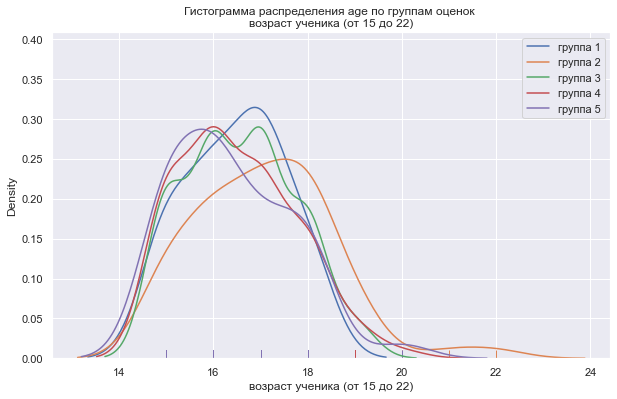

In [82]:
display(pivot_t_score_group('age'))
get_distplot('age')

С 18 лет уже хуже имеют результат по экзамену. В основном хорошие и лучшие баллы (группа 4 и 5) имеют 16-летние.
Как и показала корреляция - этот показатель влияет на результат

Сводная таблица по столбцу - medu
образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)


score                               % 0.0 % 1.0 % 2.0 % 3.0 % 4.0
medu          0.0   1.0   2.0   3.0    4.0  All                              
score_group                                                                  
1             NaN   4.0   4.0   7.0    8.0   23   NaN  17.4  17.4  30.4  34.8
2             1.0  11.0  17.0  17.0   20.0   66   1.5  16.7  25.8  25.8  30.3
3             NaN  24.0  38.0  33.0   36.0  131   NaN  18.3  29.0  25.2  27.5
4             2.0   6.0  23.0  19.0   41.0   91   2.2   6.6  25.3  20.9  45.1
5             NaN   2.0   4.0  11.0   22.0   39   NaN   5.1  10.3  28.2  56.4
All           3.0  47.0  86.0  87.0  127.0  350   0.9  13.4  24.6  24.9  36.3

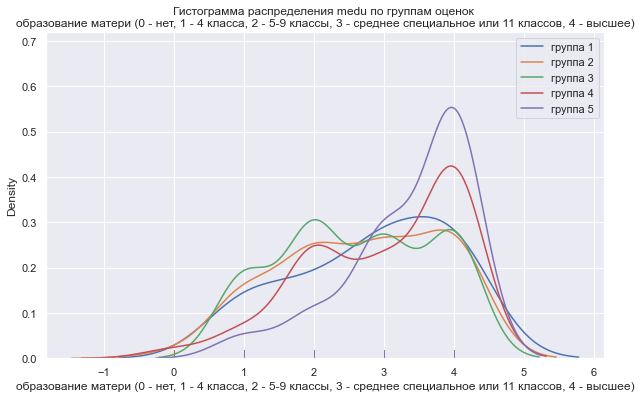

In [83]:
display(pivot_t_score_group('medu'))
get_distplot('medu')

Образование матери оказывает влияние на результат. В группах с высокими оценками у мам высшее образование встречается чаще.

Сводная таблица по столбцу - fedu
образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)


score                              % 0.0 % 1.0 % 2.0 % 3.0 % 4.0
fedu          0.0   1.0   2.0   3.0   4.0  All                              
score_group                                                                 
1             NaN   5.0   7.0   5.0   5.0   22   NaN  22.7  31.8  22.7  22.7
2             NaN  16.0  15.0  20.0   9.0   60   NaN  26.7  25.0  33.3  15.0
3             1.0  27.0  36.0  33.0  28.0  125   0.8  21.6  28.8  26.4  22.4
4             NaN  12.0  27.0  20.0  27.0   86   NaN  14.0  31.4  23.3  31.4
5             1.0   5.0   8.0  10.0  12.0   36   2.8  13.9  22.2  27.8  33.3
All           2.0  65.0  93.0  88.0  81.0  329   0.6  19.8  28.3  26.7  24.6

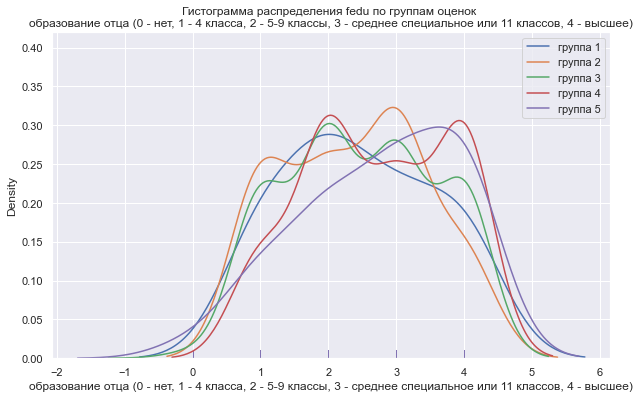

In [84]:
display(pivot_t_score_group('fedu'))
get_distplot('fedu')

По образованию отца картина более сглажена. Там не выявлено такой сильной разницы. Хотя тоже есть. Чем лучше образование родителей, тем чаще дети получают более высокие баллы.

Сводная таблица по столбцу - traveltime
время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)


score                       % 1.0 % 2.0 % 3.0 % 4.0
traveltime     1.0   2.0   3.0  4.0  All                        
score_group                                                     
1             18.0   4.0   1.0  NaN   23  78.3  17.4   4.3   NaN
2             43.0  19.0   2.0  2.0   66  65.2  28.8   3.0   3.0
3             84.0  35.0   8.0  4.0  131  64.1  26.7   6.1   3.1
4             66.0  19.0   5.0  1.0   91  72.5  20.9   5.5   1.1
5             29.0   9.0   1.0  NaN   39  74.4  23.1   2.6   NaN
All          240.0  86.0  17.0  7.0  350  68.6  24.6   4.9   2.0

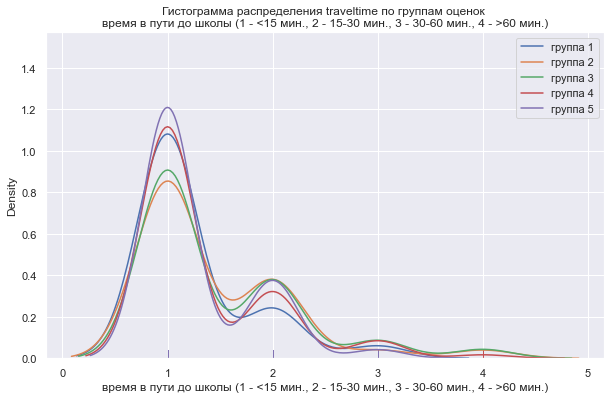

In [85]:
display(pivot_t_score_group('traveltime'))
get_distplot('traveltime')

В большинстве случаев школа находится близко от дома (время пути менее 15 минут). Какой либо закономерности не выявлено.

Сводная таблица по столбцу - studytime
время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)


score                         % 1.0 % 2.0 % 3.0 % 4.0
studytime     1.0    2.0   3.0   4.0  All                        
score_group                                                      
1             7.0   15.0   NaN   1.0   23  30.4  65.2   NaN   4.3
2            17.0   36.0  10.0   3.0   66  25.8  54.5  15.2   4.5
3            34.0   69.0  20.0   8.0  131  26.0  52.7  15.3   6.1
4            23.0   42.0  19.0   7.0   91  25.3  46.2  20.9   7.7
5             9.0   16.0   9.0   5.0   39  23.1  41.0  23.1  12.8
All          90.0  178.0  58.0  24.0  350  25.7  50.9  16.6   6.9

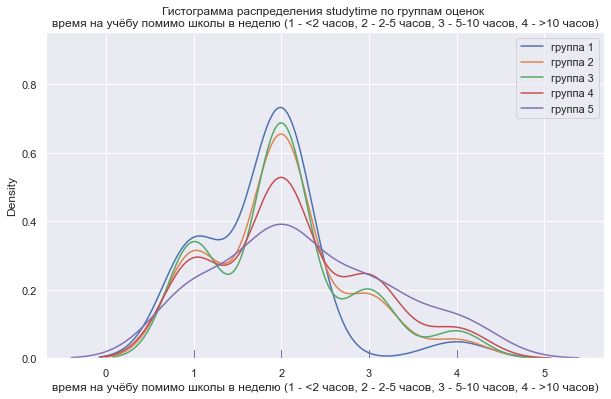

In [86]:
display(pivot_t_score_group('studytime'))
get_distplot('studytime')

В большенстве своем ученики тратят в среднем 2-5 часов в неделю (%2.0) на учебу помимо школы. Но у тех, чей результат по экзамену выше тратят времени больше (если рассмотреть столбец %3.0 и %4.0 в процентном соотношении по группам 23.1% -> 0 и 12.8% -> 4,3% соответсвенно).
Влияние на результат есть.

Сводная таблица по столбцу - failures
количество внеучебных неудач (n, если 1<=n<=3, иначе 0)


score                        % 0.0 % 1.0 % 2.0 % 3.0
failures       0.0   1.0   2.0   3.0  All                        
score_group                                                      
1             18.0   2.0   2.0   1.0   23  78.3   8.7   8.7   4.3
2             42.0  14.0   5.0   5.0   66  63.6  21.2   7.6   7.6
3            111.0  15.0   1.0   4.0  131  84.7  11.5   0.8   3.1
4             83.0   6.0   2.0   NaN   91  91.2   6.6   2.2   NaN
5             38.0   1.0   NaN   NaN   39  97.4   2.6   NaN   NaN
All          292.0  38.0  10.0  10.0  350  83.4  10.9   2.9   2.9

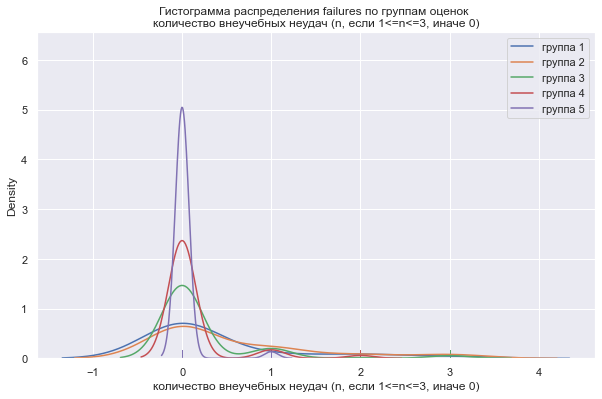

In [87]:
display(pivot_t_score_group('failures'))
get_distplot('failures')

Количество внеучебных неудач оказывает влияние на результат. Это видели раньше при расчете корреляции - получили отрицательную. Дети, отличники 97,4% не сталкивались с неудачами , и только 2,6% детей имели одну. Тогда как дети с плохими результатами чаще сталкивались с внеучебными неудачами.  

Сводная таблица по столбцу - studytime, granular
пока неизвесно


score                         % -12.0 % -9.0 % -6.0 % -3.0
studytime, granular -12.0  -9.0   -6.0  -3.0  All                             
score_group                                                                   
1                     1.0   NaN   15.0   7.0   23     4.3    NaN   65.2   30.4
2                     3.0  10.0   36.0  17.0   66     4.5   15.2   54.5   25.8
3                     8.0  20.0   69.0  34.0  131     6.1   15.3   52.7   26.0
4                     7.0  19.0   42.0  23.0   91     7.7   20.9   46.2   25.3
5                     5.0   9.0   16.0   9.0   39    12.8   23.1   41.0   23.1
All                  24.0  58.0  178.0  90.0  350     6.9   16.6   50.9   25.7

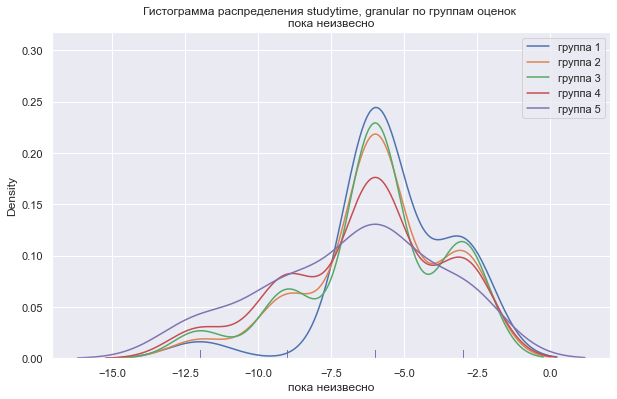

In [88]:
display(pivot_t_score_group('studytime, granular'))
get_distplot('studytime, granular')

У большинства значение -6.0. Но зависимость имеется. По значению -12.0 (12.8(5) -> 4.3(1)), -9.0 (23.1(5) -> 15.2(1)) и противоположная зависимость -6.0 (41(5) -> 65.2(1)), -3.0(23.1(5) -> 30.4(1)) 

Сводная таблица по столбцу - famrel
семейные отношения (от 1 - очень плохо до 5 - очень хорошо)


score                               % 1.0 % 2.0 % 3.0 % 4.0 % 5.0
famrel        1.0   2.0   3.0    4.0   5.0  All                              
score_group                                                                  
1             NaN   1.0   4.0   13.0   5.0   23   NaN   4.3  17.4  56.5  21.7
2             1.0   3.0  12.0   39.0  11.0   66   1.5   4.5  18.2  59.1  16.7
3             3.0   4.0  20.0   71.0  33.0  131   2.3   3.1  15.3  54.2  25.2
4             2.0   4.0  16.0   45.0  24.0   91   2.2   4.4  17.6  49.5  26.4
5             1.0   1.0   4.0   19.0  14.0   39   2.6   2.6  10.3  48.7  35.9
All           7.0  13.0  56.0  187.0  87.0  350   2.0   3.7  16.0  53.4  24.9

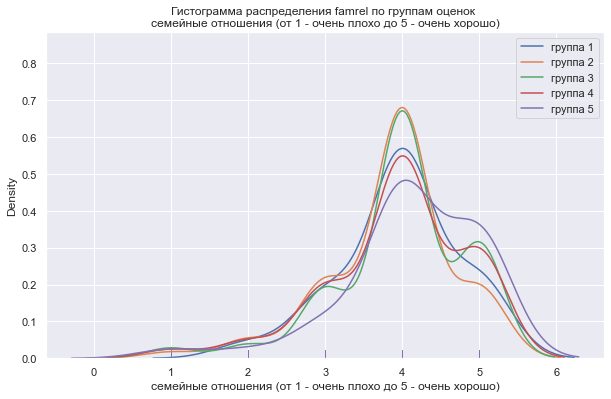

In [89]:
display(pivot_t_score_group('famrel'))
get_distplot('famrel')

Семейные отношения у большинства детей хорошие. У 35,9% отличников по экзамену отношения в кругу семьи отличные, тогда как у тех, кто имеет результат плохой всего 21,7% детей имеют отличные взаимоотношения. Средние результаты распределились между ними. 
Корреляция низкая. Посмотрим на тесте.

Сводная таблица по столбцу - freetime
свободное время после школы (от 1 - очень мало до 5 - очень мого)


score                        % 1.0 % 2.0 % 3.0 % 4.0 % 5.0
freetime      1.0 2.0  3.0  4.0 5.0  All                              
score_group                                                           
1               1   2   10    6   4   23   4.3   8.7  43.5  26.1  17.4
2               4   9   25   25   3   66   6.1  13.6  37.9  37.9   4.5
3               7  22   54   34  14  131   5.3  16.8  41.2  26.0  10.7
4               2  18   38   27   6   91   2.2  19.8  41.8  29.7   6.6
5               2   8   12   10   7   39   5.1  20.5  30.8  25.6  17.9
All            16  59  139  102  34  350   4.6  16.9  39.7  29.1   9.7

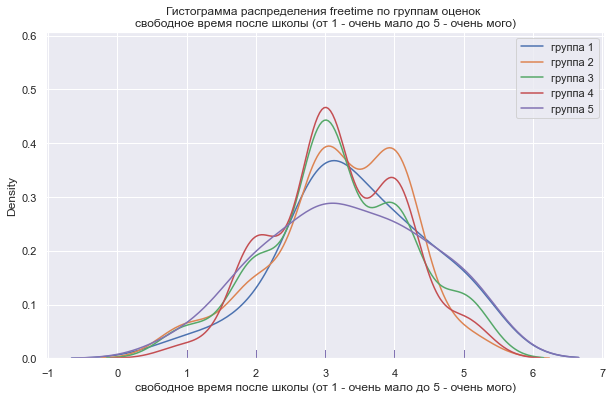

In [90]:
display(pivot_t_score_group('freetime'))
get_distplot('freetime')

По свободному времени после школы нет какой-то четкой взаимосвязи. 39,7% детей имеет среднее количество этого времени. Совсем мало свободного времени имеют 4,6% детей и совсем много 9,7%.

Сводная таблица по столбцу - goout
проведение времени с друзьями (от 1 - очень мало до 5 - очень много)


score                       % 1.0 % 2.0 % 3.0 % 4.0 % 5.0
goout         1.0 2.0  3.0 4.0 5.0  All                              
score_group                                                          
1               1   3    7   6   6   23   4.3  13.0  30.4  26.1  26.1
2               1  12   22  21  10   66   1.5  18.2  33.3  31.8  15.2
3              10  37   46  22  16  131   7.6  28.2  35.1  16.8  12.2
4               4  26   36  20   5   91   4.4  28.6  39.6  22.0   5.5
5               2  14   13   4   6   39   5.1  35.9  33.3  10.3  15.4
All            18  92  124  73  43  350   5.1  26.3  35.4  20.9  12.3

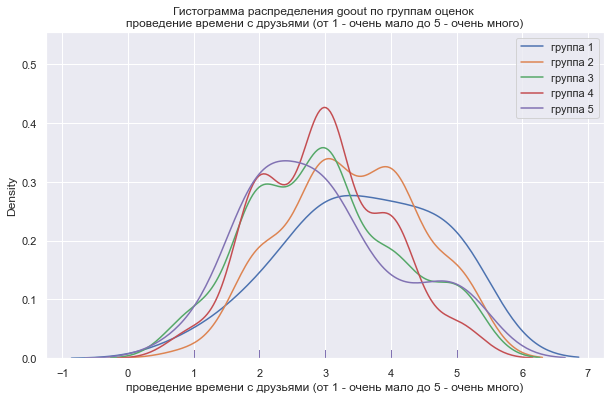

In [91]:
display(pivot_t_score_group('goout'))
get_distplot('goout')

Проведение времени с друзьями тоже нет четкой зависимости. Но дети с отличным результатом его проводят меньше, чем с плохим результатом.
Но корреляция показала результат -0.18. Если проверку тестом пройдет, то будем учитывать.

Сводная таблица по столбцу - health
текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)


score                       % 1.0 % 2.0 % 3.0 % 4.0 % 5.0
health        1.0 2.0 3.0 4.0  5.0  All                              
score_group                                                          
1               3   3   5   2   10   23  13.0  13.0  21.7   8.7  43.5
2               5   4  18  13   26   66   7.6   6.1  27.3  19.7  39.4
3              13  11  38  18   51  131   9.9   8.4  29.0  13.7  38.9
4              17  12  13  11   38   91  18.7  13.2  14.3  12.1  41.8
5               7   6   6   8   12   39  17.9  15.4  15.4  20.5  30.8
All            45  36  80  52  137  350  12.9  10.3  22.9  14.9  39.1

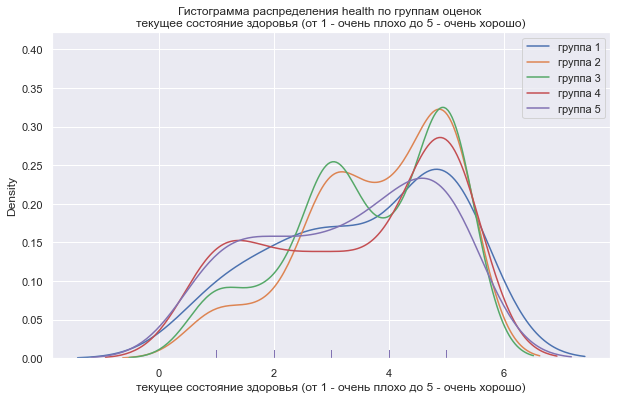

In [92]:
display(pivot_t_score_group('health'))
get_distplot('health')

В районе 39% ребят имеют очень хорошее здоровье. Плохое и не очень чаще встречается у 4 и 5 групп, реже 1, а в 2 и  3 всего 6-10% имеют плохое и не очень здоровье.
Как таковая зависимость не улавливается.

,absences
score_group,
1,9.695652
2,9.409091
3,5.824427
4,4.857143
5,4.128205
All,6.314286


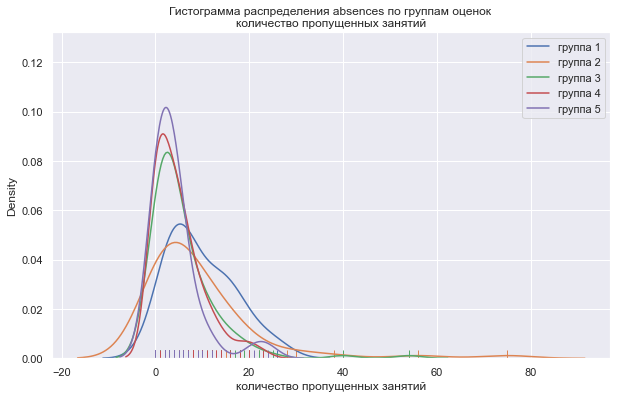

In [93]:
display(pd.pivot_table(score_group_1_5, index=[
        'score_group'], values=['absences'], aggfunc='mean', margins=True))
get_distplot('absences')

Чем выше результат, тем в среднем ребята меньше пропускали занятия. Это подтверждает и отрицательный коэффициент корреляции.

Построим график зависимостей.

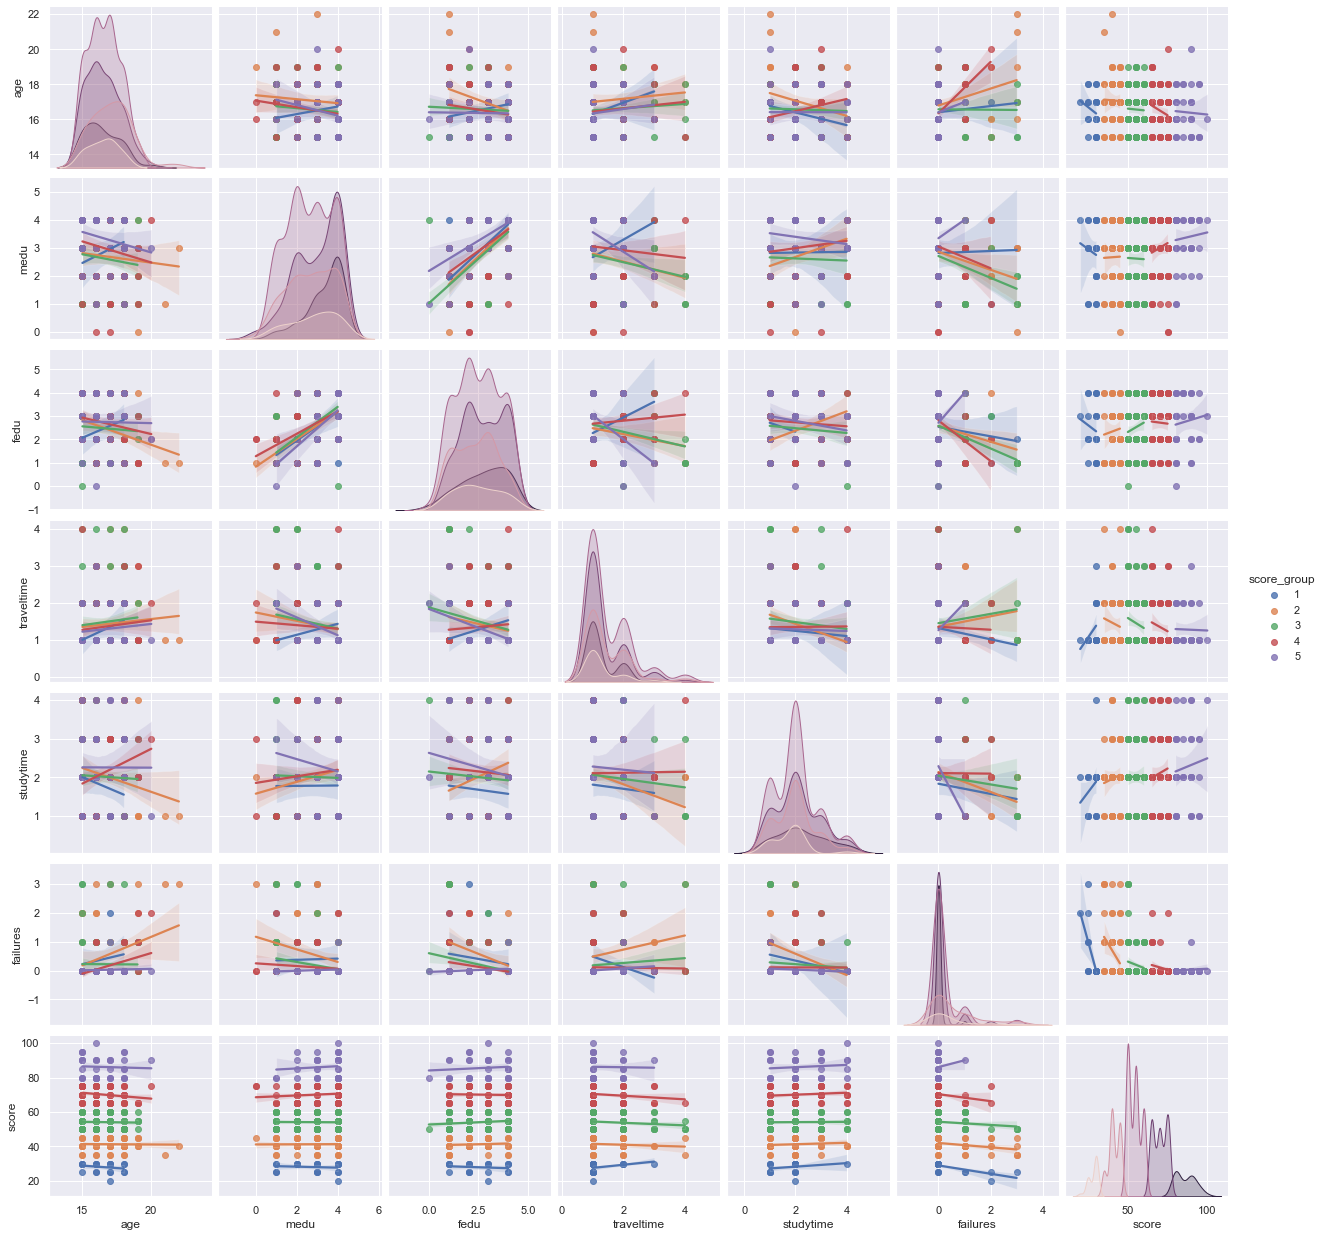

In [94]:
# Много данных - поделим таблицу данных на 2
sns.pairplot(score_group_1_5, vars=['age', 'medu', 'fedu', 'traveltime',
             'studytime', 'failures', 'score'], kind='reg', hue='score_group')

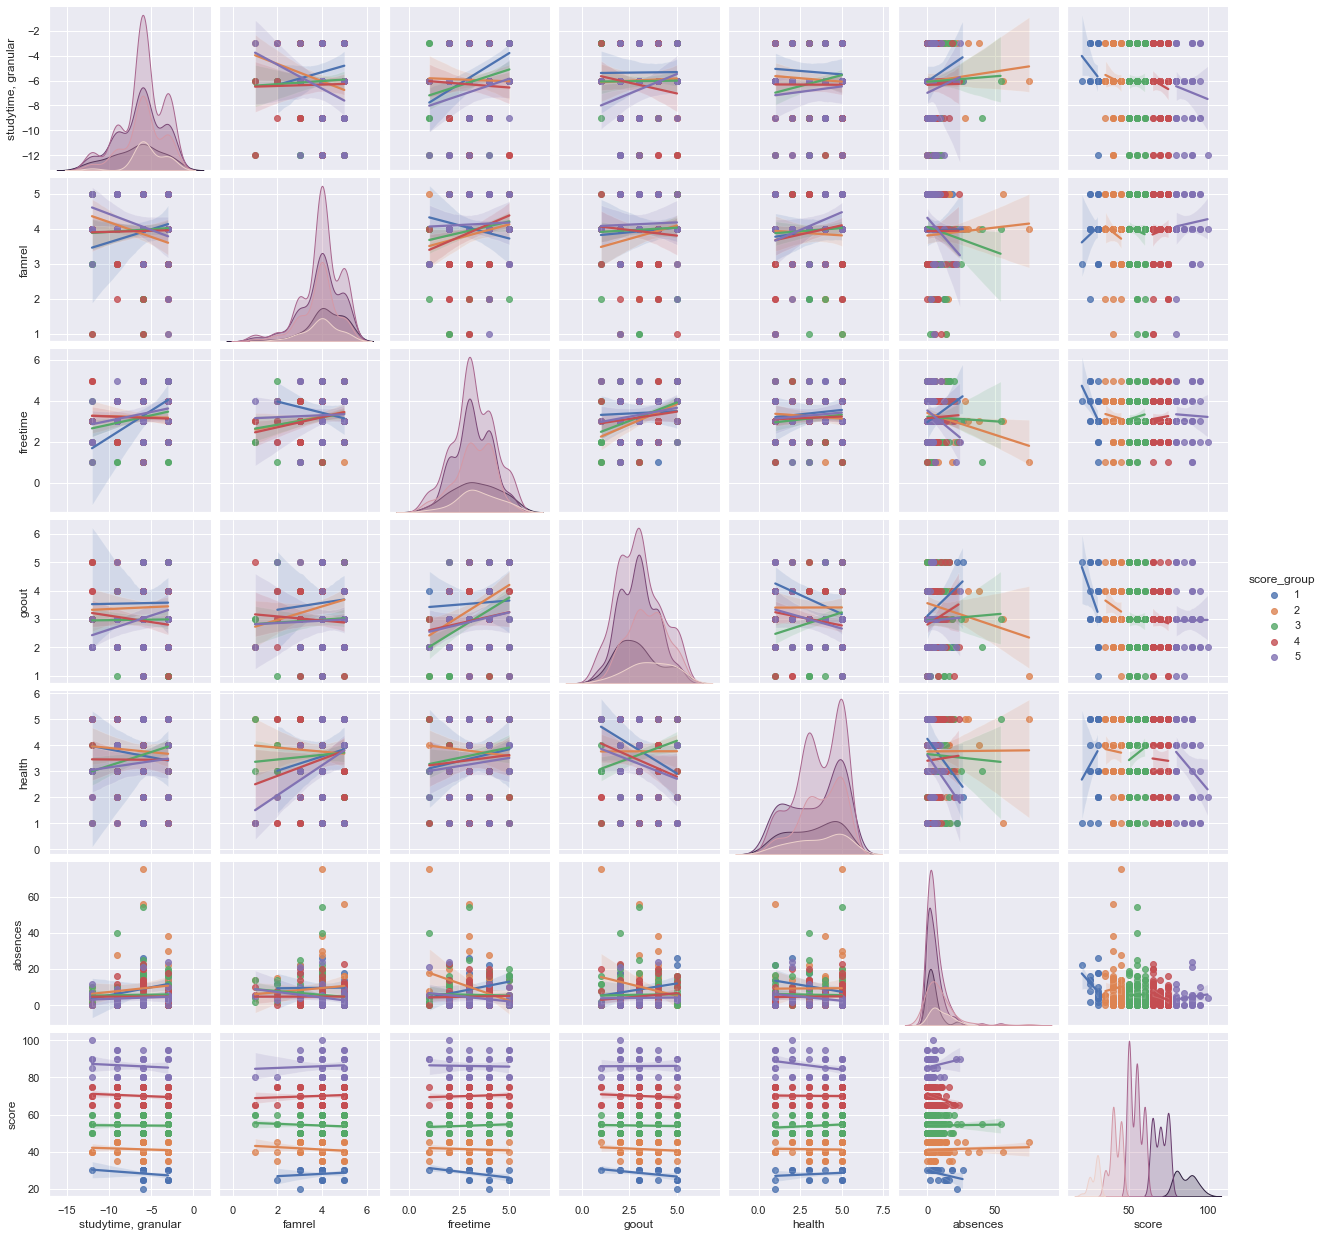

In [95]:
sns.pairplot(score_group_1_5, vars=['studytime, granular', 'famrel', 'freetime',
             'goout', 'health', 'absences', 'score'], kind='reg', hue='score_group')

### Пробежимся по номинативным переменным с помощью графика боксплот и сводных таблиц.

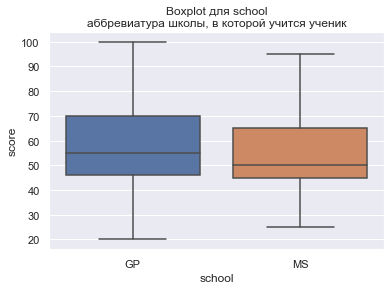

Сводная таблица по столбцу - school
аббревиатура школы, в которой учится ученик


score           % GP  % MS
school         GP  MS  All            
score_group                           
1              20   3   23  87.0  13.0
2              58   8   66  87.9  12.1
3             114  17  131  87.0  13.0
4              82   9   91  90.1   9.9
5              36   3   39  92.3   7.7
All           310  40  350  88.6  11.4

In [96]:
get_boxplot('school')
display(pivot_t_score_group('school'))

Школу GP выбирают больше, чем MS (88.6 против 11,4). Хотя в группах, прослеживается закономерность - группы с более высокими баллами гр.4 и гр.5 на 5-7% чаще выбирают школу GP. Но мы не можем судить по выбору школы. Так как процент детей, учащийся в школах MS мал.

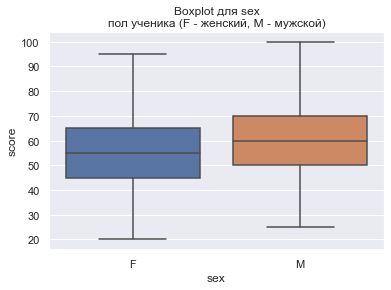

Сводная таблица по столбцу - sex
пол ученика (F - женский, M - мужской)


score             % F   % M
sex             F    M  All            
score_group                            
1              17    6   23  73.9  26.1
2              34   32   66  51.5  48.5
3              68   63  131  51.9  48.1
4              47   44   91  51.6  48.4
5              15   24   39  38.5  61.5
All           181  169  350  51.7  48.3

In [97]:
get_boxplot('sex')
display(pivot_t_score_group('sex'))

Внутри одного пола распределения одинаковое (коробочки одного размера). Но мальчики лучше усваивают математику. 
И в сводной таблице прослеживается линейная связь, что мальчики имеют более высокие баллы чаще, чем девочки, особенно в 5  группе (отличники). А очень плохо сдают в основном девочки (1 группа).
Этот показатель влияет на результат экзамена. 

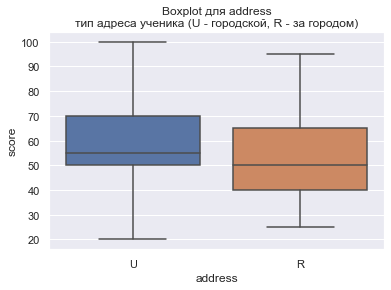

Сводная таблица по столбцу - address
тип адреса ученика (U - городской, R - за городом)


score             % R   % U
address         R    U  All            
score_group                            
1               7   16   23  30.4  69.6
2              15   51   66  22.7  77.3
3              32   99  131  24.4  75.6
4              12   79   91  13.2  86.8
5               7   32   39  17.9  82.1
All            73  277  350  20.9  79.1

In [98]:
get_boxplot('address')
display(pivot_t_score_group('address'))

79% учащихся живет в городе. Но если сравнивать по группам, то группы 4 и 5 имеет более высокий процент с признаком город. И чем ниже группа (хуже результат), тем процент проживающих в городе ниже, а за городом соответственно выше.
Стоит отметить этот показатель.

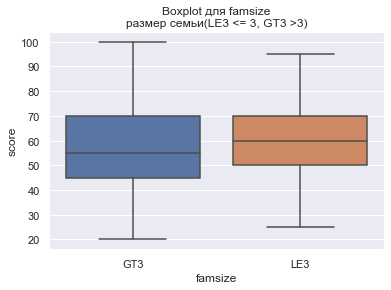

Сводная таблица по столбцу - famsize
размер семьи(LE3 <= 3, GT3 >3)


score          % GT3 % LE3
famsize       GT3 LE3  All            
score_group                           
1              17   6   23  73.9  26.1
2              48  18   66  72.7  27.3
3              94  37  131  71.8  28.2
4              66  25   91  72.5  27.5
5              26  13   39  66.7  33.3
All           251  99  350  71.7  28.3

In [99]:
get_boxplot('famsize')
display(pivot_t_score_group('famsize'))

Семьи, где больше трех человек встечаются чаще, чем 3 и менее человека. Распределены в основном одинакого, за исключением 5 группы. Здесь больший процент, по сравнению с 1-4 граппами, маленьких семей.
Влияние на результат он не оказывает.

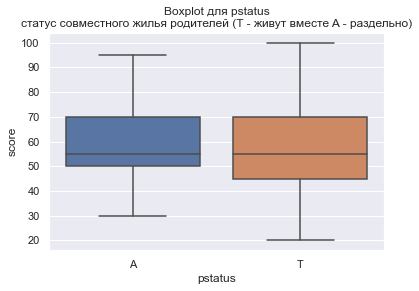

Сводная таблица по столбцу - pstatus
статус совместного жилья родителей (T - живут вместе A - раздельно)


score             % A   % T
pstatus         A    T  All            
score_group                            
1               3   20   23  13.0  87.0
2               5   61   66   7.6  92.4
3              13  118  131   9.9  90.1
4               7   84   91   7.7  92.3
5               5   34   39  12.8  87.2
All            33  317  350   9.4  90.6

In [100]:
get_boxplot('pstatus')
pivot_t_score_group('pstatus')

В основном 90% имеют полные семьи. Но в группах 1 и 5 этот процент немного ниже. А в группах 2 и 4 немного выше. 
У учащихся, у которых родители живут раздельнно результаты по 25% квартилю выше и нижний ус на 10 балов выше, чем если родители живут вместе. Медиана у них одинаковая.
Никакой четкой закономерности я здесь не вижу. Наерное не стоит учитывать этот фактор. 

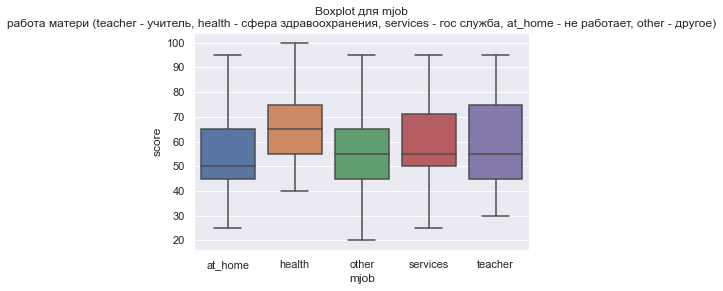

Сводная таблица по столбцу - mjob
работа матери (teacher - учитель, health - сфера здравоохранения, services - гос служба, at_home - не работает, other - другое)


score                                     % at_home % health  \
mjob        at_home health  other services teacher  All                      
score_group                                                                  
1               5.0    NaN   12.0      5.0     1.0   23      21.7      NaN   
2               8.0    5.0   26.0     14.0    13.0   66      12.1      7.6   
3              21.0    7.0   51.0     36.0    16.0  131      16.0      5.3   
4              13.0   13.0   33.0     20.0    12.0   91      14.3     14.3   
5               2.0    5.0   10.0     13.0     9.0   39       5.1     12.8   
All            49.0   30.0  132.0     88.0    51.0  350      14.0      8.6   

            % other % services % teacher  
mjob                                      
score_group                               
1              52.2       21.7       4.3  
2              39.4       21.2      19.7  
3              38.9       27.5      12.2  
4              36.3       22.0      13.2  
5              25.6       33.3      23.1  
All            37.7       25.1      14.6

In [101]:
get_boxplot('mjob')
display(pivot_t_score_group('mjob'))

График отличаются сильно по всем показателям: медиана, коробочка, усы. Это подсказывает, что данный показатель оказывает влияние на результат.

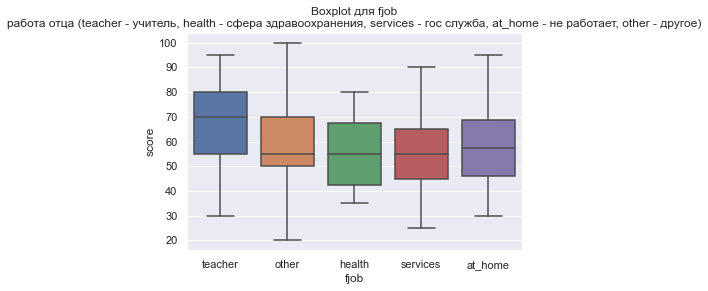

Сводная таблица по столбцу - fjob
работа отца (teacher - учитель, health - сфера здравоохранения, services - гос служба, at_home - не работает, other - другое)


score                                     % at_home % health  \
fjob        at_home health  other services teacher  All                      
score_group                                                                  
1               1.0    NaN   16.0      4.0     2.0   23       4.3      NaN   
2               3.0    6.0   34.0     21.0     2.0   66       4.5      9.1   
3               4.0    3.0   81.0     36.0     7.0  131       3.1      2.3   
4               4.0    5.0   56.0     20.0     6.0   91       4.4      5.5   
5               2.0    1.0   21.0      7.0     8.0   39       5.1      2.6   
All            14.0   15.0  208.0     88.0    25.0  350       4.0      4.3   

            % other % services % teacher  
fjob                                      
score_group                               
1              69.6       17.4       8.7  
2              51.5       31.8       3.0  
3              61.8       27.5       5.3  
4              61.5       22.0       6.6  
5              53.8       17.9      20.5  
All            59.4       25.1       7.1

In [102]:
get_boxplot('fjob')
display(pivot_t_score_group('fjob'))

Графики так же, как и у работы матери, отличаются сильно по всем показателям: медиана, коробочка, усы. 
Отцы в своем большенстве работают на других работах, не выделенныз в выборке и меньше сидят дома по сравнению с мамами. Особенности: среди отличников папы учителя втречаются в 3-4 раза чаще, чем среди остальных групп и . Наверное папы являются преподавателями технических специальностей.
Предположим, что данный показатель так же оказывает влияние на результат.

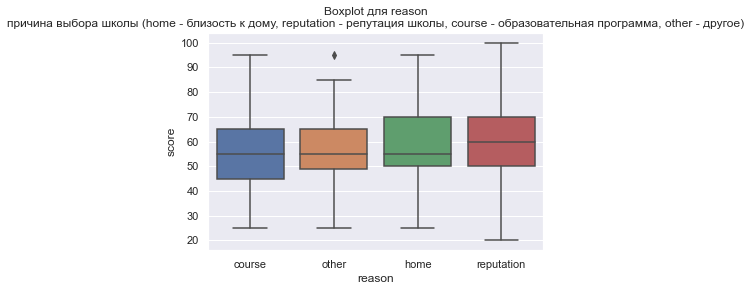

Сводная таблица по столбцу - reason
причина выбора школы (home - близость к дому, reputation - репутация школы, course - образовательная программа, other - другое)


score                            % course % home % other  \
reason      course home other reputation  All                           
score_group                                                             
1                9    5     2          7   23     39.1   21.7     8.7   
2               29   15     6         16   66     43.9   22.7     9.1   
3               52   36    11         32  131     39.7   27.5     8.4   
4               28   23    10         30   91     30.8   25.3    11.0   
5               15   10     3         11   39     38.5   25.6     7.7   
All            133   89    32         96  350     38.0   25.4     9.1   

            % reputation  
reason                    
score_group               
1                   30.4  
2                   24.2  
3                   24.4  
4                   33.0  
5                   28.2  
All                 27.4

In [103]:
get_boxplot('reason')
display(pivot_t_score_group('reason'))

Выбор школы исходя из репутации по медиане имеет более высокий показатель, но и размах у нее в обе стороны одинаковый, что по 25 и 75 квартилю, что и по усам. По сводной таблице видим выбор школы чаще всего основывается на образовательной программе. 
Каких то конкретных закономерностей, влияющих на результат, не выявлено.

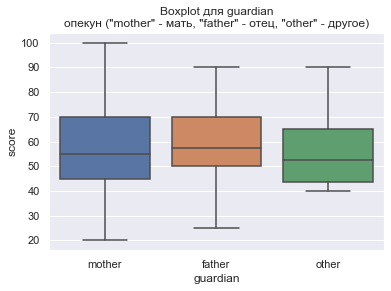

Сводная таблица по столбцу - guardian
опекун ("mother" - мать, "father" - отец, "other" - другое)


score                   % father % mother % other
guardian    father mother other  All                          
score_group                                                   
1              5.0   18.0   NaN   23     21.7     78.3     NaN
2             11.0   48.0   7.0   66     16.7     72.7    10.6
3             31.0   93.0   7.0  131     23.7     71.0     5.3
4             21.0   66.0   4.0   91     23.1     72.5     4.4
5             10.0   27.0   2.0   39     25.6     69.2     5.1
All           78.0  252.0  20.0  350     22.3     72.0     5.7

In [104]:
get_boxplot('guardian')
display(pivot_t_score_group('guardian'))

Опекунами детей в основном является мать (72%). Отец намного реже (22%). Но есть закономерность. При более высоких баллах опекунство отцом встречается чаще, чем при низких баллах. У матерей наоборот, при более низникх баллах встречается чаще (78%), чем при более высоких(69), а в средних (2-4 группы) распределено равномерно.
У учеников (с опекуном мать) разброс результатов больше всего. 
Тут неоднозначно. Посмотрим как этот показатель пройдет тест.

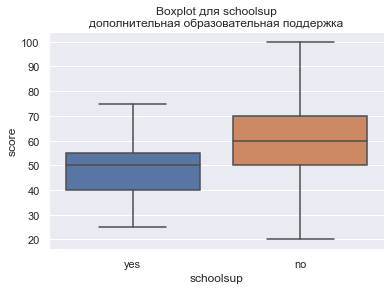

Сводная таблица по столбцу - schoolsup
дополнительная образовательная поддержка


score              % no % yes
schoolsup       no   yes  All             
score_group                               
1             15.0   8.0   23   65.2  34.8
2             52.0  14.0   66   78.8  21.2
3            110.0  21.0  131   84.0  16.0
4             87.0   4.0   91   95.6   4.4
5             39.0   NaN   39  100.0   NaN
All          303.0  47.0  350   86.6  13.4

In [105]:
get_boxplot('schoolsup')
display(pivot_t_score_group('schoolsup'))

Дополнительной образовательной поддержкой чаще пользуются ученики, у которых результат экзамена ниже. У кого результат выше среднего обычно не нуждаются в ней.
Те, кто находится в группе 5 (отличники) ей не пользовались.Прослеживается линейная связь от гр.5 к гр.1 (0 -> 4.4% -> 16% -> 21.2% -> 34.8%)
Существенный показатель.

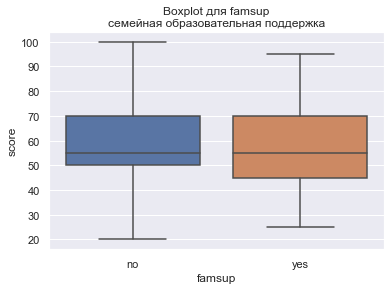

Сводная таблица по столбцу - famsup
семейная образовательная поддержка


score            % no % yes
famsup         no  yes  All            
score_group                            
1               5   18   23  21.7  78.3
2              23   43   66  34.8  65.2
3              45   86  131  34.4  65.6
4              34   57   91  37.4  62.6
5              13   26   39  33.3  66.7
All           120  230  350  34.3  65.7

In [106]:
get_boxplot('famsup')
display(pivot_t_score_group('famsup'))

Семейной образовательной поддержкой пользовались все ученики примерно одинакого ~ 66%. Только группа 1 на 13% чаще обраращалась к родительской поддержки.
По этому показателю невозможно судить о результатах экзамена.

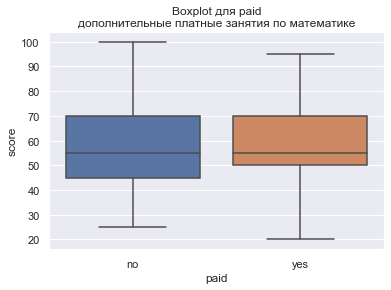

Сводная таблица по столбцу - paid
дополнительные платные занятия по математике


score            % no % yes
paid           no  yes  All            
score_group                            
1              13    7   20  65.0  35.0
2              30   29   59  50.8  49.2
3              63   54  117  53.8  46.2
4              39   43   82  47.6  52.4
5              24   12   36  66.7  33.3
All           169  145  314  53.8  46.2

In [107]:
get_boxplot('paid')
display(pivot_t_score_group('paid'))

Дополнительные платные занятия чаще брали дети средних результатов - группы 2, 3 и 4. Особенно хорошисты - 4.
Неоднозначно он влияет на резльтат.

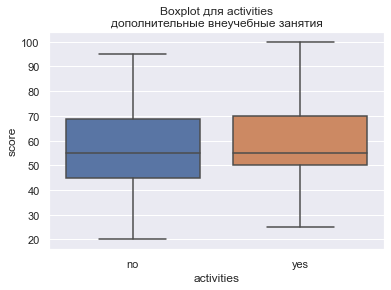

Сводная таблица по столбцу - activities
дополнительные внеучебные занятия


score            % no % yes
activities     no  yes  All            
score_group                            
1              15    8   23  65.2  34.8
2              30   36   66  45.5  54.5
3              61   70  131  46.6  53.4
4              42   49   91  46.2  53.8
5              18   21   39  46.2  53.8
All           166  184  350  47.4  52.6

In [108]:
get_boxplot('activities')
display(pivot_t_score_group('activities'))

Дополнительными внучебными занятиями занималась примерно половина детей в равной степени во всех группах, кроме 1. У них на 19% меньше посещает доп занятия - всего 34.8%.
У посещающий дополнительные внеучебные занятия оценки ниже 50 получают реже. 
Не влияет на результат.

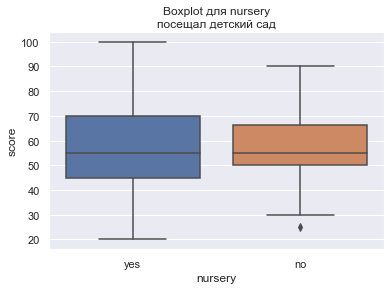

Сводная таблица по столбцу - nursery
посещал детский сад


score            % no % yes
nursery        no  yes  All            
score_group                            
1               3   20   23  13.0  87.0
2              13   53   66  19.7  80.3
3              32   99  131  24.4  75.6
4              16   75   91  17.6  82.4
5               4   35   39  10.3  89.7
All            68  282  350  19.4  80.6

In [109]:
get_boxplot('nursery')
display(pivot_t_score_group('nursery'))

80.6% детей посещали детский сад. Меньше всего в 3 группе. Распределение в форме параболы. 
У  тех, кто пощещал детский сад вариативнойсть результата экзамена выше. Медина на одном уровне с теми, кто не посещал.
Но, как мне кажеться влияние тут незначительное.

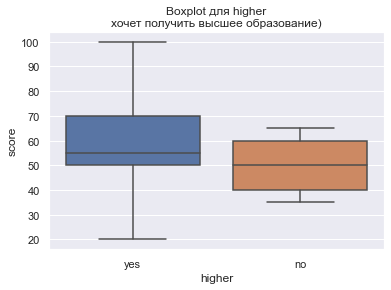

Сводная таблица по столбцу - higher
хочет получить высшее образование)


score             % no  % yes
higher         no    yes  All            
score_group                              
1             NaN   23.0   23  NaN  100.0
2             6.0   60.0   66  9.1   90.9
3             6.0  125.0  131  4.6   95.4
4             1.0   90.0   91  1.1   98.9
5             NaN   39.0   39  NaN  100.0
All          13.0  337.0  350  3.7   96.3

In [110]:
get_boxplot('higher')
display(pivot_t_score_group('higher'))

У тех, кто желает получить высшее образования в основной массе оценки выше. Но раздрос по усам гораздо больше. У тех, кто не планирует получать высшее образование результат находится на среднем уровне 40-60 баллов в основном, и реже 35 и 65. 
Из сводной таблице видим, что получить высшее образование желают 96,3%. Со 2 по 4 группу есть желающие получить средне-профессиональное образование по линейной зависимости 1.1(4) -> 4.6(3) -> 9.1(2). А в 5 и 1 группах все желают получить высшее образование.
Так что он не может по нему оценивать влияние.

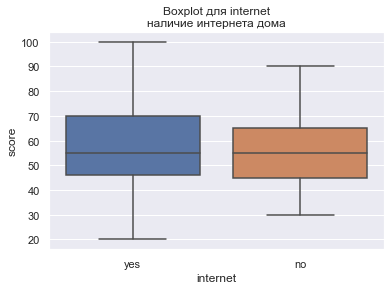

Сводная таблица по столбцу - internet
наличие интернета дома


score            % no % yes
internet       no  yes  All            
score_group                            
1               3   20   23  13.0  87.0
2              10   56   66  15.2  84.8
3              22  109  131  16.8  83.2
4              10   81   91  11.0  89.0
5               3   36   39   7.7  92.3
All            48  302  350  13.7  86.3

In [111]:
get_boxplot('internet')
display(pivot_t_score_group('internet'))

Наличие интернета дает более широкий размах как и в плюс 75 квартиль выше и ус верхний, так и в некоторой степени в минус - ус нижний до самого низа (интернет явно не для учебы используют) 
Интернет есть у 86,3% детей. Зависимость по параболе. Больше процент детей имеют интернет в 1 и 5 группе и меньше всего процент детей в 3 группе. Разница небольшая.
Не будем рассматривать этот фактор как влияющий на результат.

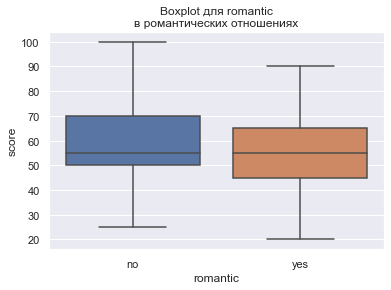

Сводная таблица по столбцу - romantic
в романтических отношениях


score            % no % yes
romantic       no  yes  All            
score_group                            
1              18    5   23  78.3  21.7
2              40   26   66  60.6  39.4
3              95   36  131  72.5  27.5
4              63   28   91  69.2  30.8
5              30    9   39  76.9  23.1
All           246  104  350  70.3  29.7

In [112]:
get_boxplot('romantic')
display(pivot_t_score_group('romantic'))

В романических отношениях медиана на одном уровне у кого есть, и у кого нет. Но по разбосу нижнего и верхнего квартиля получается, что у кого нет романтическиих отношений результат лучше.
По сводной таблице видим, что романтических отношения больший процент детей во 2 группе (ниже среднего результат), а меньший в 1 (где худший результат).
Неоднозначный показатель.

### Теперь проверим, есть ли статистическая разница в распределении оценок по всем признакам с помощью теста Стьюдента

Нулевая гипотеза: распределения оценок учащихся по экзамену по различным параметрам неразличимы.

Исходя из проведенного анализа, мое предположение, что влияние на результат экзамена по математике оказывают следующие условия:
1. 'sex', 
2. 'age'
3. 'address'
4. 'medu' 
5. 'fedu',
6. 'mjob' 
7. 'fjob'
8. 'guardian' - под ?
9. 'studytime',
10. 'failures'
11. 'schoolsup'
12. 'studytime, granular'
13. 'famrel' - под ?
14. 'goout'
15. 'absences'    

In [113]:
# Проверка всех колонок:
column_list = ['school', 'sex', 'age', 'address', 'famsize', 'pstatus', 'medu', 'fedu',
               'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime',
               'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
               'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
               'freetime', 'goout', 'health', 'absences']
for col in column_list:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки age
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки medu
Найдены статистически значимые различия для колонки fedu
Найдены статистически значимые различия для колонки mjob
Найдены статистически значимые различия для колонки studytime
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки schoolsup
Найдены статистически значимые различия для колонки studytime, granular
Найдены статистически значимые различия для колонки goout


Не прошли проверку колонки:
1. 'fjob'
2. 'guardian'
3. 'famrel'
4. 'absences'

Если в 'guardian' и 'famrel' я сомневалась и тест их отбросил. То работа отца и пропуски я думаю надо будет включить в отборочную таблицу. Но при этом в дальнейшем использовании учесть, что тест не нашел в них значимых различий. 

### Создаем таблицы с отобранными столбцами:

In [114]:
stud_for_model = stud.loc[:, ['sex', 'age', 'address', 'medu', 'fedu', 'mjob', 'fjob',
                              'studytime', 'failures', 'schoolsup', 'studytime, granular',
                              'goout', 'absences', 'score', 'score_group']]
display(stud_for_model.sample(10))

,sex,age,address,medu,fedu,mjob,fjob,studytime,failures,schoolsup,"studytime, granular",goout,absences,score,score_group
155,M,15,R,2.0,3.0,at_home,services,2.0,0.0,yes,-6.0,4.0,2.0,40.0,2
80,M,15,U,2.0,3.0,other,services,1.0,0.0,yes,-3.0,2.0,2.0,60.0,3
16,F,16,U,4.0,4.0,services,services,3.0,0.0,no,-9.0,3.0,6.0,70.0,4
67,F,16,U,3.0,NaN,services,other,4.0,0.0,yes,-12.0,3.0,4.0,30.0,1
260,F,18,U,4.0,3.0,other,other,2.0,0.0,no,-6.0,2.0,21.0,90.0,5
31,M,15,U,4.0,4.0,services,other,2.0,0.0,no,-6.0,1.0,0.0,85.0,5
158,M,16,R,2.0,2.0,at_home,other,1.0,0.0,no,-3.0,2.0,2.0,75.0,4
367,F,17,R,1.0,1.0,other,services,1.0,1.0,no,-3.0,1.0,0.0,0.0,0
212,F,16,U,2.0,2.0,other,other,2.0,0.0,yes,-6.0,4.0,0.0,70.0,4
19,M,16,U,4.0,3.0,health,other,1.0,0.0,no,-3.0,3.0,4.0,50.0,3


In [115]:
stud_for_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 387 entries, 0 to 394
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   sex                  387 non-null    object 
 1   age                  387 non-null    int64  
 2   address              387 non-null    object 
 3   medu                 387 non-null    float64
 4   fedu                 363 non-null    float64
 5   mjob                 387 non-null    object 
 6   fjob                 387 non-null    object 
 7   studytime            387 non-null    float64
 8   failures             387 non-null    float64
 9   schoolsup            387 non-null    object 
 10  studytime, granular  387 non-null    float64
 11  goout                387 non-null    float64
 12  absences             387 non-null    float64
 13  score                387 non-null    float64
 14  score_group          387 non-null    int64  
dtypes: float64(8), int64(2), object(5)
memor

In [116]:
score_1_5_for_model = score_group_1_5.loc[:, ['sex', 'age', 'address', 'medu', 'fedu', 'mjob', 'fjob',
                                              'studytime', 'failures', 'schoolsup', 'studytime, granular',
                                              'goout', 'absences', 'score', 'score_group']]
display(score_1_5_for_model.sample(10))

,sex,age,address,medu,fedu,mjob,fjob,studytime,failures,schoolsup,"studytime, granular",goout,absences,score,score_group
231,M,17,R,2.0,2.0,other,other,2.0,0.0,no,-6.0,2.0,4.0,55.0,3
167,F,16,U,4.0,2.0,health,services,2.0,0.0,no,-6.0,3.0,0.0,80.0,5
391,M,17,U,3.0,1.0,services,services,1.0,0.0,no,-3.0,5.0,3.0,80.0,5
124,F,16,U,2.0,2.0,other,other,2.0,0.0,no,-6.0,4.0,0.0,40.0,2
67,F,16,U,3.0,NaN,services,other,4.0,0.0,yes,-12.0,3.0,4.0,30.0,1
311,F,19,U,2.0,1.0,at_home,other,2.0,0.0,no,-6.0,1.0,20.0,65.0,4
157,F,18,R,1.0,1.0,at_home,other,1.0,3.0,no,-3.0,5.0,6.0,50.0,3
267,F,18,R,4.0,4.0,teacher,other,2.0,0.0,no,-6.0,4.0,8.0,55.0,3
119,M,15,U,3.0,4.0,other,other,1.0,0.0,no,-3.0,3.0,6.0,65.0,4
15,F,16,U,4.0,4.0,health,other,1.0,0.0,no,-3.0,4.0,4.0,70.0,4


In [117]:
score_1_5_for_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 350 entries, 0 to 394
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   sex                  350 non-null    object 
 1   age                  350 non-null    int64  
 2   address              350 non-null    object 
 3   medu                 350 non-null    float64
 4   fedu                 329 non-null    float64
 5   mjob                 350 non-null    object 
 6   fjob                 350 non-null    object 
 7   studytime            350 non-null    float64
 8   failures             350 non-null    float64
 9   schoolsup            350 non-null    object 
 10  studytime, granular  350 non-null    float64
 11  goout                350 non-null    float64
 12  absences             350 non-null    float64
 13  score                350 non-null    float64
 14  score_group          350 non-null    int64  
dtypes: float64(8), int64(2), object(5)
memor

#### Выводы:

В предоставленных данных достаточно мало пустых значений не более 11,4 % по столбцу.

Выбросы найдены только в одном столбце absences (количество пропусков) - 2 шт, что позволяет сделать вывод о том, что данные достаточно чистые.

Самые важные параметры, которые предлагается использовать в дальнейшем для прогнозирования результатов по госэкзамену по математике и иных исследований в этом направлении: 'sex', 'age', 'address', 'medu', 'fedu', 'mjob', 'studytime', 'failures', 'schoolsup', 'studytime, granular', 'goout'. 
А так же: 'absences' и 'fjob', но учитывать, что они не прошли тест-проверку. 
